# 데이터수집

In [ ]:
import pandas as pd
import csv
from urllib.request import urlopen
import json
import requests
from bs4 import BeautifulSoup

import tkinter as tk
from tkinter import scrolledtext

## 날짜별 데이터

### 경기일정별 관중 수 수집 

- 출처 : KBO 공식 홈페이지
- 수집기간 : 2022.04.02 ~ 2024.10.01

In [98]:
#df = pd.read_csv('Kbo.csv', sep = '\t')
#df

# CSV 파일 경로
csv_file = 'kbo.csv'

# 엑셀 파일로 변환
excel_file = 'kbo.xlsx'

# CSV 파일을 읽어들여 DataFrame으로 저장
df = pd.read_csv(csv_file)

# DataFrame을 엑셀 파일로 저장
df.to_excel(excel_file, index=False, engine='openpyxl')

print(f"CSV 파일이 엑셀 파일로 변환되었습니다: {excel_file}")


CSV 파일이 엑셀 파일로 변환되었습니다: kbo.xlsx


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>날짜</th>
      <th>요일</th>
      <th>홈</th>
      <th>방문</th>
      <th>구장</th>
      <th>관중수</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2022/04/02</td>
      <td>토</td>
      <td>두산</td>
      <td>한화</td>
      <td>잠실</td>
      <td>16,271</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2022/04/02</td>
      <td>토</td>
      <td>KIA</td>
      <td>LG</td>
      <td>광주</td>
      <td>16,908</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2022/04/02</td>
      <td>토</td>
      <td>키움</td>
      <td>롯데</td>
      <td>고척</td>
      <td>8,257</td>
    </tr>
    <tr>
      <th>3</th>
      <td>2022/04/02</td>
      <td>토</td>
      <td>NC</td>
      <td>SSG</td>
      <td>창원</td>
      <td>7,814</td>
    </tr>
    <tr>
      <th>4</th>
      <td>2022/04/02</td>
      <td>토</td>
      <td>KT</td>
      <td>삼성</td>
      <td>수원</td>
      <td>17,057</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>2156</th>
      <td>2024/09/28</td>
      <td>토</td>
      <td>KT</td>
      <td>키움</td>
      <td>수원</td>
      <td>18,700</td>
    </tr>
    <tr>
      <th>2157</th>
      <td>2024/09/29</td>
      <td>일</td>
      <td>한화</td>
      <td>NC</td>
      <td>대전</td>
      <td>12,000</td>
    </tr>
    <tr>
      <th>2158</th>
      <td>2024/09/30</td>
      <td>월</td>
      <td>KIA</td>
      <td>NC</td>
      <td>광주</td>
      <td>20,500</td>
    </tr>
    <tr>
      <th>2159</th>
      <td>2024/09/30</td>
      <td>월</td>
      <td>SSG</td>
      <td>키움</td>
      <td>문학</td>
      <td>23,000</td>
    </tr>
    <tr>
      <th>2160</th>
      <td>2024/10/01</td>
      <td>화</td>
      <td>NC</td>
      <td>롯데</td>
      <td>창원</td>
      <td>17,891</td>
    </tr>
  </tbody>
</table>
<p>2161 rows × 6 columns</p>
</div>

### 홈 경기장 연도별 관중수

In [ ]:
file_path = '시즌경기_수정2.xlsx'  # 파일 경로
data = pd.read_excel(file_path, usecols=['날짜', '홈', '관중수'], header=0)

# Step 1: 데이터 전처리
# 날짜를 datetime 형식으로 변환
data['날짜'] = pd.to_datetime(data['날짜'], format='%Y-%m-%d', errors='coerce')

# 관중수 열을 숫자형으로 변환 (문자열을 NaN으로 처리)
data['관중수'] = pd.to_numeric(data['관중수'], errors='coerce')

# 결측치 확인 및 제거
print("결측치 확인:")
print(data.isnull().sum())

# 결측치가 있는 행 제거
data = data.dropna(subset=['날짜', '홈', '관중수'])

# 날짜에서 연도 추출
data['연도'] = data['날짜'].dt.year

# Step 2: 홈 경기장별, 연도별 관람객 수 집계
grouped_data = data.groupby(['홈', '연도'])['관중수'].sum().reset_index()

# Step 3: 결과 확인
print("=== 홈 경기장별 연도별 관람객 수 합계 ===")
print(grouped_data)

# Step 4: 결과를 엑셀로 저장 (옵션)
output_file = '홈경기장_연도별_관람객수.xlsx'
grouped_data.to_excel(output_file, index=False)
print(f"결과가 '{output_file}' 파일로 저장되었습니다.")

결측치 확인:
날짜       0
홈        0
관중수    214
dtype: int64
=== 홈 경기장별 연도별 관람객 수 합계 ===
      홈    연도        관중수
0   KIA  2022   604394.0
1   KIA  2023   713677.0
2   KIA  2024  1259249.0
3    KT  2022   532268.0
4    KT  2023   698074.0
5    KT  2024   843942.0
6    LG  2022   930163.0
7    LG  2023  1197141.0
8    LG  2024  1397499.0
9    NC  2022   369018.0
10   NC  2023   550903.0
11   NC  2024   756049.0
12  SSG  2022   981546.0
13  SSG  2023  1070012.0
14  SSG  2024  1143773.0
15   두산  2022   644614.0
16   두산  2023   979998.0
17   두산  2024  1301768.0
18   롯데  2022   631656.0
19   롯데  2023   829129.0
20   롯데  2024  1196637.0
21   삼성  2022   674452.0
22   삼성  2023   803155.0
23   삼성  2024  1326690.0
24   키움  2022   349773.0
25   키움  2023   584914.0
26   키움  2024   808350.0
27   한화  2022   358190.0
28   한화  2023   563982.0
29   한화  2024   760673.0
결과가 '홈경기장_연도별_관람객수.xlsx' 파일로 저장되었습니다.


### 날짜, 지역별 평균기온(API수집)  
- 기상청 API 수집 
- 수집기간 : 2022.04.02 ~ 2024.10.01

#### 서울 (LG, 두산)

In [56]:
# 세 개의 URL
urls = [
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20220402&endDt=20221011&stnIds=108&dataType=JSON",
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20230401&endDt=20231017&stnIds=108&dataType=JSON",
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20240323&endDt=20241001&stnIds=108&dataType=JSON"
]

# CSV 파일로 저장
with open('merged_weather_seoul_data.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Time', 'Station Name', 'Average Temperature (avgTa)'])  # 헤더 작성

    # 세 개의 URL에서 데이터 가져오기
    for url in urls:
        answer = urlopen(url).read()
        data = json.loads(answer)

        # 각 항목에 대해 필요한 데이터 추출하여 CSV에 기록 (지역, 기온)
        for item in data["response"]["body"]["items"]["item"]:
            writer.writerow([item["tm"], item["stnNm"], item["avgTa"]])

print("CSV 파일이 생성되었습니다.")

CSV 파일이 생성되었습니다.


In [1]:
#공백제거
#import pandas as pd
#df = pd.read_csv('merged_weather_seoul_data.csv', sep = '\t')
#df

In [59]:
# CSV 파일 경로
csv_file = 'merged_weather_seoul_data.csv'

# 엑셀 파일로 변환
excel_file = 'merged_weather_seoul_data.xlsx'

# CSV 파일을 읽어들여 DataFrame으로 저장
df = pd.read_csv(csv_file)

# DataFrame을 엑셀 파일로 저장
df.to_excel(excel_file, index=False, engine='openpyxl')

print(f"CSV 파일이 엑셀 파일로 변환되었습니다: {excel_file}")

CSV 파일이 엑셀 파일로 변환되었습니다: merged_weather_seoul_data.xlsx


In [3]:
# API 정보

# 기아 광주광역시 (156 광주 광주지방기상청)
# 한화 대전광역시 (133 대전 대전지방기상청)
# 삼성 대구광역시 (143 대구 대구지방기상청)
# 롯데 부산광역시 (159 부산 부산지방기상청)
# NC 경상남도 창원시 (155 창원 창원기상대)
# SSG 경기도 인천시 (112 인천 수도권기상청)
# KT 경기도 수원시 (119 수원 수도권기상청)

### 광주 (KIA)

In [ ]:
# 세 개의 URL
urls = [
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20220402&endDt=20221011&stnIds=156&dataType=JSON",
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20230401&endDt=20231017&stnIds=156&dataType=JSON",
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20240323&endDt=20241001&stnIds=156&dataType=JSON"
]

# CSV 파일로 저장
with open('merged_weather_Gwangju_data.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Time', 'Station Name', 'Average Temperature (avgTa)'])  # 헤더 작성

    # 세 개의 URL에서 데이터 가져오기
    for url in urls:
        answer = urlopen(url).read()
        data = json.loads(answer)

        # 각 항목에 대해 필요한 데이터 추출하여 CSV에 기록
        for item in data["response"]["body"]["items"]["item"]:
            writer.writerow([item["tm"], item["stnNm"], item["avgTa"]])

# CSV 파일 경로
csv_file = 'merged_weather_Gwangju_data.csv'

# 엑셀 파일로 변환
excel_file = 'merged_weather_Gwangju_data.xlsx'

# CSV 파일을 읽어들여 DataFrame으로 저장
df = pd.read_csv(csv_file)

# DataFrame을 엑셀 파일로 저장
df.to_excel(excel_file, index=False, engine='openpyxl')

print(f"CSV 파일이 엑셀 파일로 변환되었습니다: {excel_file}")

CSV 파일이 엑셀 파일로 변환되었습니다: merged_weather_Gwangju_data.xlsx


### 대전 (한화)

In [ ]:
# 세 개의 URL
urls = [
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20220402&endDt=20221011&stnIds=133&dataType=JSON",
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20230401&endDt=20231017&stnIds=133&dataType=JSON",
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20240323&endDt=20241001&stnIds=133&dataType=JSON"
]

# CSV 파일로 저장
with open('merged_weather_Daejeon_data.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Time', 'Station Name', 'Average Temperature (avgTa)'])  # 헤더 작성

    # 세 개의 URL에서 데이터 가져오기
    for url in urls:
        answer = urlopen(url).read()
        data = json.loads(answer)

        # 각 항목에 대해 필요한 데이터 추출하여 CSV에 기록
        for item in data["response"]["body"]["items"]["item"]:
            writer.writerow([item["tm"], item["stnNm"], item["avgTa"]])

# CSV 파일 경로
csv_file = 'merged_weather_Daejeon_data.csv'

# 엑셀 파일로 변환
excel_file = 'merged_weather_Daejeon_data.xlsx'

# CSV 파일을 읽어들여 DataFrame으로 저장
df = pd.read_csv(csv_file)

# DataFrame을 엑셀 파일로 저장
df.to_excel(excel_file, index=False, engine='openpyxl')

print(f"CSV 파일이 엑셀 파일로 변환되었습니다: {excel_file}")

CSV 파일이 엑셀 파일로 변환되었습니다: merged_weather_Daejeon_data.xlsx


### 대구 (삼성)

In [ ]:
# 세 개의 URL
urls = [
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20220402&endDt=20221011&stnIds=143&dataType=JSON",
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20230401&endDt=20231017&stnIds=143&dataType=JSON",
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20240323&endDt=20241001&stnIds=143&dataType=JSON"
]

# CSV 파일로 저장
with open('merged_weather_Daegu_data.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Time', 'Station Name', 'Average Temperature (avgTa)'])  # 헤더 작성

    # 세 개의 URL에서 데이터 가져오기
    for url in urls:
        answer = urlopen(url).read()
        data = json.loads(answer)

        # 각 항목에 대해 필요한 데이터 추출하여 CSV에 기록
        for item in data["response"]["body"]["items"]["item"]:
            writer.writerow([item["tm"], item["stnNm"], item["avgTa"]])

# CSV 파일 경로
csv_file = 'merged_weather_Daegu_data.csv'

# 엑셀 파일로 변환
excel_file = 'merged_weather_Daegu_data.xlsx'

# CSV 파일을 읽어들여 DataFrame으로 저장
df = pd.read_csv(csv_file)

# DataFrame을 엑셀 파일로 저장
df.to_excel(excel_file, index=False, engine='openpyxl')

print(f"CSV 파일이 엑셀 파일로 변환되었습니다: {excel_file}")

CSV 파일이 엑셀 파일로 변환되었습니다: merged_weather_Daegu_data.xlsx


### 부산(롯데)

In [ ]:
# 세 개의 URL
urls = [
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20220402&endDt=20221011&stnIds=159&dataType=JSON",
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20230401&endDt=20231017&stnIds=159&dataType=JSON",
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20240323&endDt=20241001&stnIds=159&dataType=JSON"
]

# CSV 파일로 저장
with open('merged_weather_Busan_data.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Time', 'Station Name', 'Average Temperature (avgTa)'])  # 헤더 작성

    # 세 개의 URL에서 데이터 가져오기
    for url in urls:
        answer = urlopen(url).read()
        data = json.loads(answer)

        # 각 항목에 대해 필요한 데이터 추출하여 CSV에 기록
        for item in data["response"]["body"]["items"]["item"]:
            writer.writerow([item["tm"], item["stnNm"], item["avgTa"]])

# CSV 파일 경로
csv_file = 'merged_weather_Busan_data.csv'

# 엑셀 파일로 변환
excel_file = 'merged_weather_Busan_data.xlsx'

# CSV 파일을 읽어들여 DataFrame으로 저장
df = pd.read_csv(csv_file)

# DataFrame을 엑셀 파일로 저장
df.to_excel(excel_file, index=False, engine='openpyxl')

print(f"CSV 파일이 엑셀 파일로 변환되었습니다: {excel_file}")

CSV 파일이 엑셀 파일로 변환되었습니다: merged_weather_Busan_data.xlsx


### 창원 (NC)

In [ ]:
# 세 개의 URL
urls = [
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20220402&endDt=20221011&stnIds=155&dataType=JSON",
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20230401&endDt=20231017&stnIds=155&dataType=JSON",
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20240323&endDt=20241001&stnIds=155&dataType=JSON"
]

# CSV 파일로 저장
with open('merged_weather_Changwon_data.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Time', 'Station Name', 'Average Temperature (avgTa)'])  # 헤더 작성

    # 세 개의 URL에서 데이터 가져오기
    for url in urls:
        answer = urlopen(url).read()
        data = json.loads(answer)

        # 각 항목에 대해 필요한 데이터 추출하여 CSV에 기록
        for item in data["response"]["body"]["items"]["item"]:
            writer.writerow([item["tm"], item["stnNm"], item["avgTa"]])

# CSV 파일 경로
csv_file = 'merged_weather_Changwon_data.csv'

# 엑셀 파일로 변환
excel_file = 'merged_weather_Changwon_data.xlsx'

# CSV 파일을 읽어들여 DataFrame으로 저장
df = pd.read_csv(csv_file)

# DataFrame을 엑셀 파일로 저장
df.to_excel(excel_file, index=False, engine='openpyxl')

print(f"CSV 파일이 엑셀 파일로 변환되었습니다: {excel_file}")

CSV 파일이 엑셀 파일로 변환되었습니다: merged_weather_Changwon_data.xlsx


### 인천 (SSG)

In [ ]:
# 세 개의 URL
urls = [
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20220402&endDt=20221011&stnIds=112&dataType=JSON",
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20230401&endDt=20231017&stnIds=112&dataType=JSON",
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20240323&endDt=20241001&stnIds=112&dataType=JSON"
]

# CSV 파일로 저장
with open('merged_weather_Incheon_data.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Time', 'Station Name', 'Average Temperature (avgTa)'])  # 헤더 작성

    # 세 개의 URL에서 데이터 가져오기
    for url in urls:
        answer = urlopen(url).read()
        data = json.loads(answer)

        # 각 항목에 대해 필요한 데이터 추출하여 CSV에 기록
        for item in data["response"]["body"]["items"]["item"]:
            writer.writerow([item["tm"], item["stnNm"], item["avgTa"]])

# CSV 파일 경로
csv_file = 'merged_weather_Incheon_data.csv'

# 엑셀 파일로 변환
excel_file = 'merged_weather_Incheon_data.xlsx'

# CSV 파일을 읽어들여 DataFrame으로 저장
df = pd.read_csv(csv_file)

# DataFrame을 엑셀 파일로 저장
df.to_excel(excel_file, index=False, engine='openpyxl')

print(f"CSV 파일이 엑셀 파일로 변환되었습니다: {excel_file}")

CSV 파일이 엑셀 파일로 변환되었습니다: merged_weather_Incheon_data.xlsx


### 수원 (KT)

In [ ]:
# 세 개의 URL
urls = [
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20220402&endDt=20221011&stnIds=119&dataType=JSON",
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20230401&endDt=20231017&stnIds=119&dataType=JSON",
    "http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList?serviceKey=v5LyzVE9YQNhEaNhuKvxh1JNptv%2FY%2BJP0XCmj5viS4YaXfWOiaiDAnkoFIYF9JcFo5LH463XidSXgmuVsBFuDw%3D%3D&numOfRows=200&pageNo=1&dataCd=ASOS&dateCd=DAY&startDt=20240323&endDt=20241001&stnIds=119&dataType=JSON"
]

# CSV 파일로 저장
with open('merged_weather_Suwon_data.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Time', 'Station Name', 'Average Temperature (avgTa)'])  # 헤더 작성

    # 세 개의 URL에서 데이터 가져오기
    for url in urls:
        answer = urlopen(url).read()
        data = json.loads(answer)

        # 각 항목에 대해 필요한 데이터 추출하여 CSV에 기록
        for item in data["response"]["body"]["items"]["item"]:
            writer.writerow([item["tm"], item["stnNm"], item["avgTa"]])

# CSV 파일 경로
csv_file = 'merged_weather_Suwon_data.csv'

# 엑셀 파일로 변환
excel_file = 'merged_weather_Suwon_data.xlsx'

# CSV 파일을 읽어들여 DataFrame으로 저장
df = pd.read_csv(csv_file)

# DataFrame을 엑셀 파일로 저장
df.to_excel(excel_file, index=False, engine='openpyxl')

print(f"CSV 파일이 엑셀 파일로 변환되었습니다: {excel_file}")

CSV 파일이 엑셀 파일로 변환되었습니다: merged_weather_Suwon_data.xlsx


## 웹크롤링

### 인터넷 팬 데이터
- 네이버카페 '현장 직관 후기' 검색 웹크롤링(제목, 날짜, 내용전체)
- 수집기간 : 2022.01.01~2024.11.29
- 구단별 100개 (총 1000개)

In [4]:
# 네이버 '현장 직관 후기' 검색시 나오는 화면에서 제목과 내용 추출해보기

In [15]:

# 크롤링할 URL
url = "https://search.naver.com/search.naver?sm=tab_hty.top&ssc=tab.blog.all&query=%ED%94%84%EB%A1%9C%EC%95%BC%EA%B5%AC%ED%98%84%EC%9E%A5%EC%A7%81%EA%B4%80%ED%9B%84%EA%B8%B0&oquery=%EC%95%BC%EA%B5%AC%ED%98%84%EC%9E%A5%EC%A7%81%EA%B4%80%ED%9B%84%EA%B8%B0&tqi=i0j9ZsqVOZossgu%2BtqRsssssths-488128"

# HTTP GET 요청
response = requests.get(url)

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')

# 제목과 내용 추출
titles = soup.find_all('a', class_='title_link')  # 제목
contents = soup.find_all('a', class_='dsc_link')  # 내용

# 크롤링된 제목과 내용 출력 (숫자 붙이기)
for idx, (title, content) in enumerate(zip(titles, contents), start=1):
    title_text = title.get_text(strip=True)
    content_text = content.get_text(strip=True)
    
    print(f"{idx}. 제목: {title_text}")
    print(f"   내용: {content_text}")
    print("-" * 50)


1. 제목: 잠실야구장 LG트윈스 vs 두산베어스 2023프로야구직관티켓 예매 및현장구매 팁
   내용: 지난 주 잠시 다녀온 육지여행에서 친구와 술한잔하다가 2023프로야구LG트윈스 경기가 일요일 잠실야구장에서 열리는걸 확인하고는 즉흥적으로 다녀왔는데요. 인터넷 티켓 예매 방법과현장구매해서직관을 즐긴후기까지 소개해봅니다. 먼저 인터넷 예매는 티켓링크에서만 가능하고 앱을 다운받아 회원가입을 거쳐야합니다. 인기 많은 응원석 주변 자리를 원하는...
--------------------------------------------------
2. 제목: 2024프로야구한국시리즈 5차전 기아타이거즈 우승직관 후기
   내용: 2024프로야구한국시리즈는 역대급 경기력과 흥미진진한 스토리로 많은 야구팬들의 심장을 뛰게 했어요! 특히 5차전은 시리즈의 향방을 결정짓는 중요한 경기였기에 챔피언스필느는 그 어느 때보다 뜨거운 열기로 가득했어요. 그현장에 다녀온 감동과 짜릿함의후기시작합니다! 2024프로야구한국시리즈 5차전직관하러 광주로 떠났어요. 하 이번 일정 아주...
--------------------------------------------------
3. 제목: 2024 플레이오프프로야구포스트시즌직관후기
   내용: 2024 플레이오프프로야구포스트시즌직관후기2024프로야구도 끝나서 하루하루 무료한 롯데팬 인용어입니다 :D 10월이 되고 2024시즌 가을야구 포스트시즌이 시작되었어요.... 오랜만에 야구장현장에서 느끼는 응원열기 정말 신나구요 XD 처음엔 롯데응원만 하다가 삼성응원가부터 따라 할려니 버벅였지만 홈런도 많이 나오고 쉴 틈 없이 응원하니 금방 적응하고...
--------------------------------------------------
4. 제목: [프로야구직관후기] 최강 한화 VS KT (수원KT위즈파크)
   내용: 가게된프로야구직관이야기를 한번 써볼게요~ 6.4.화 18:30 한화 이글스 VS KT 위즈 수원KT위즈파크 오늘의 경기 아침에

In [2]:
#  웹 페이지에서 특정 데이터를 크롤링하는 간단한 프로그램을 구현한 예제

In [ ]:


# 크롤링 함수
def crawl_url():
    url = url_entry.get()  # 입력된 URL 가져오기
    try:
        # URL 요청
        response = requests.get(url)
        # HTML 파싱
        soup = BeautifulSoup(response.text, 'html.parser')

        # 제목과 내용 추출
        titles = soup.find_all('a', class_='title_link')  # 제목
        contents = soup.find_all('a', class_='dsc_link')  # 내용

        # 출력할 결과 문자열 초기화
        result_text.delete(1.0, tk.END)  # 기존 결과 삭제
        for idx, (title, content) in enumerate(zip(titles, contents), start=1):
            title_text = title.get_text(strip=True)
            content_text = content.get_text(strip=True)

            result_text.insert(tk.END, f"{idx}. 제목: {title_text}\n")
            result_text.insert(tk.END, f"   내용: {content_text}\n")
            result_text.insert(tk.END, "-" * 50 + "\n")
    except Exception as e:
        result_text.delete(1.0, tk.END)
        result_text.insert(tk.END, f"Error occurred: {e}")

# Tkinter 윈도우 설정
root = tk.Tk()
root.title("웹 크롤링 프로그램")
root.geometry("600x400")

# URL 입력 레이블과 입력칸
url_label = tk.Label(root, text="URL을 입력하세요:")
url_label.pack(pady=10)

url_entry = tk.Entry(root, width=50)
url_entry.pack(pady=5)

# 크롤링 시작 버튼
crawl_button = tk.Button(root, text="크롤링 시작", command=crawl_url)
crawl_button.pack(pady=10)

# 결과 출력 영역 (스크롤 텍스트)
result_text = scrolledtext.ScrolledText(root, width=70, height=15)
result_text.pack(pady=10)

# Tkinter GUI 루프 시작
root.mainloop()

In [99]:
#import requests
#from bs4 import BeautifulSoup

## 크롤링할 URL
#url = "https://search.naver.com/search.naver?sm=tab_hty.top&ssc=tab.blog.all&query=%ED%94%84%EB%A1%9C%EC%95%BC%EA%B5%AC%ED%98%84%EC%9E%A5%EC%A7%81%EA%B4%80%ED%9B%84%EA%B8%B0&oquery=%EC%95%BC%EA%B5%AC%ED%98%84%EC%9E%A5%EC%A7%81%EA%B4%80%ED%9B%84%EA%B8%B0&tqi=i0j9ZsqVOZossgu%2BtqRsssssths-488128"

## HTTP GET 요청
#response = requests.get(url)

## HTML 파싱
#soup = BeautifulSoup(response.text, 'html.parser')

## 제목과 내용 추출
#titles = soup.find_all('a', class_='title_link')  # 제목
#contents = soup.find_all('a', class_='dsc_link')  # 내용

# 크롤링된 제목과 내용 출력 (숫자 붙이기)
#for idx, (title, content) in enumerate(zip(titles, contents), start=1):
    #title_text = title.get_text(strip=True)
    #content_text = content.get_text(strip=True)
    
    #print(f"{idx}. 제목: {title_text}")
    #print(f"   내용: {content_text}")
    #print("-" * 50)


In [115]:
# 시도

In [5]:
# import time
# from selenium import webdriver
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.common.by import By
# from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.common.keys import Keys
# from bs4 import BeautifulSoup

# # 크롬 드라이버 경로 (본인의 경로로 수정하세요)
# driver_path = r"C:\Users\user\Desktop\drive-download-20241108T051042Z-001\chromedriver.exe"

# # Service 객체 생성 (driver_path를 설정)
# service = Service(executable_path=driver_path)

# # 크롬 옵션 설정 (필요한 경우 추가 설정)
# chrome_options = Options()
# chrome_options.add_argument("--headless")  # 브라우저 UI 없이 실행 (필요시 주석처리)

# # 크롤링할 URL
# url = "https://search.naver.com/search.naver?sm=tab_hty.top&ssc=tab.blog.all&query=%ED%94%84%EB%A1%9C%EC%95%BC%EA%B5%AC%ED%98%84%EC%9E%A5%EC%A7%81%EA%B4%80%ED%9B%84%EA%B8%B0&oquery=%EC%95%BC%EA%B5%AC%ED%98%84%EC%9E%A5%EC%A7%81%EA%B4%80%ED%9B%84%EA%B8%B0&tqi=i0j9ZsqVOZossgu%2BtqRsssssths-488128"

# # 웹 드라이버 실행 (Service 객체를 사용)
# driver = webdriver.Chrome(service=service, options=chrome_options)
# driver.get(url)

# # 15번 스크롤 하기 (1초 간격)
# for _ in range(15):
#     # 페이지 가장 아래로 스크롤
#     driver.find_element(By.TAG_NAME, 'body').send_keys(Keys.END)
#     time.sleep(1)  # 1초 대기

# # 페이지 HTML 가져오기
# html = driver.page_source

# # BeautifulSoup으로 HTML 파싱
# soup = BeautifulSoup(html, 'html.parser')

# # 제목과 내용 추출
# titles = soup.find_all('a', class_='title_link')  # 제목
# contents = soup.find_all('a', class_='dsc_link')  # 내용

# # 크롤링된 제목과 내용 출력 (번호 붙이기)
# for idx, (title, content) in enumerate(zip(titles, contents), start=1):
#     title_text = title.get_text(strip=True)
#     content_text = content.get_text(strip=True)
    
#     print(f"{idx}. 제목: {title_text}")
#     print(f"   내용: {content_text}")
#     print("-" * 50)

# # 브라우저 종료
# driver.quit()


In [6]:
# '한화 야구 직관후기'를 검색해 구단별 데이터를 수집하기 위한 시도

# 크롤링할 URL
url = "https://search.naver.com/search.naver?ssc=tab.blog.all&query=%ED%95%9C%ED%99%94%20%EC%95%BC%EA%B5%AC%20%EC%A7%81%EA%B4%80%ED%9B%84%EA%B8%B0&sm=tab_opt&nso=so%3Ar%2Cp%3A1y"

# HTTP GET 요청
response = requests.get(url)

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')

# 제목, 작성날짜, 내용 추출
titles = soup.find_all('a', class_='title_link')  # 제목
dates = soup.find_all('span', class_='sub')  # 작성 날짜
contents = soup.find_all('a', class_='dsc_link')  # 내용

# 크롤링된 제목, 날짜, 내용 출력
for idx, (title, date, content) in enumerate(zip(titles, dates, contents), start=1):
    title_text = title.get_text(strip=True)
    date_text = date.get_text(strip=True)
    content_text = content.get_text(strip=True)
    
    print(f"{idx}. 제목: {title_text}")
    print(f"   작성 날짜: {date_text}")
    print(f"   내용: {content_text}")
    print("-" * 50)


1. 제목: [대전한화이글스 파크]한화 야구경기직관 후기
   작성 날짜: 2024.06.18.
   내용: 첵오 #한화 #한화이글스 #한화생명 #한화야구장 #한화이글스파크 #대전한화이글스파크 #대전한화야구장 #대전야구장 #한화야구장좌석 #한화야구장주차 #한화야구장주차장 #야구원정 #한화이글스유니폼 #한화이글스샵 #한화이글스먹거리 #한화이글스매점 #한화이글스농심가락 #류현진 #황준서 #문동주 #야구직관 #한화야구직관 #한화야구직관후기#야구직관후기 #한화이글...
--------------------------------------------------
2. 제목: 대전한화이글스파크 |한화이글스 VS 롯데자이언츠 | 원정팀야구 직관 후기
   작성 날짜: 3주 전
   내용: 안녕하세요 혀니입니다~야구도 끝났고한화신구장 기념(변명)후기를 써보려고 왔어요 바야흐로... 9월 어느 날... 저는 이 날 경기를 보려고 대전에서 2박 3일을 보내야겠다! 싶어 예매를 다 그렇게 해놨었는데요... 네. 취소가 됐습니다. 비가 정말. 정~~~말 너무 많이 와서 우천 취소가 됐습니다... 2박 3일에서 5박 6일로 늘어나는 마법 그렇게 어찌저찌 예매를 또 성공해서...
--------------------------------------------------
3. 제목: 한화이글스야구직관야구예매 놀거리 문동주 대전역 맛집까지
   작성 날짜: 2024.06.04.
   내용: 대전 감성카페 안도르 그리고 옛 느낌이 나면서도 감성적인 예쁜 카페를 찾아서 여유를 즐겼는데요, 안도르라는 카페에서 먹은 수박쥬스가 진짜 시원하고 맛있더라고요! 시간가는 줄 모르고 신나게 즐기고 온 대전한화이글스야구직관 후기잘 보셨나요? 다음 포스팅에서는 더 유용한 정보로 찾아올게요:)
--------------------------------------------------
4. 제목: 수원KT위즈파크 3루 응원지정석 238구역 좌석 가격 주차 먹거리 워터 |한화팬의야구첫직관 후기
   작성 날짜: 2

In [6]:
# import requests
# from bs4 import BeautifulSoup

# # 크롤링할 URL
# url = "https://search.naver.com/search.naver?ssc=tab.blog.all&query=%ED%95%9C%ED%99%94%20%EC%95%BC%EA%B5%AC%20%EC%A7%81%EA%B4%80%ED%9B%84%EA%B8%B0&sm=tab_opt&nso=so%3Ar%2Cp%3A1y"

# # HTTP GET 요청
# response = requests.get(url)

# # HTML 파싱
# soup = BeautifulSoup(response.text, 'html.parser')

# # 제목, 작성날짜, 내용 추출
# titles = soup.find_all('a', class_='title_link')  # 제목
# dates = soup.find_all('span', class_='sub')  # 작성 날짜
# contents = soup.find_all('a', class_='dsc_link')  # 내용

# # 크롤링된 제목, 날짜, 내용 출력
# for idx, (title, date, content) in enumerate(zip(titles, dates, contents), start=1):
#     title_text = title.get_text(strip=True)
#     date_text = date.get_text(strip=True)
#     content_text = content.get_text(strip=True)
    
#     print(f"{idx}. 제목: {title_text}")
#     print(f"   작성 날짜: {date_text}")
#     print(f"   내용: {content_text}")
#     print("-" * 50)


In [49]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

# 크롬 브라우저 동작방식 설정
options = Options()
options.add_argument("--start-maximized")  # 창 최대화
options.add_experimental_option("detach", True)  # 크롬 브라우저 유지

# ChromeDriver 설치 및 서비스 실행
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# URL 접속
url = "https://search.naver.com/search.naver?ssc=tab.blog.all&query=%ED%95%9C%ED%99%94%20%EC%95%BC%EA%B5%AC%20%EC%A7%81%EA%B4%80%ED%9B%84%EA%B8%B0&sm=tab_opt&nso=so%3Ar%2Cp%3A1y"
driver.get(url)

# 페이지가 로드될 때까지 잠시 대기
time.sleep(2)

# 스크롤 다운 (15번)
for i in range(15):  # 스크롤을 15번 내림
    driver.find_element(By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)  # 내리기
    time.sleep(1)

# 페이지 HTML 가져오기
soup = BeautifulSoup(driver.page_source, 'html.parser')

# 제목, 작성 날짜, 내용 추출
titles = soup.find_all('a', class_='title_link')
dates = soup.find_all('span', class_='sub')  # 작성 날짜
contents = soup.find_all('a', class_='dsc_link')  # 내용

# 순서대로 번호 붙여서 제목, 작성 날짜, 내용 출력
for idx, (title, date, content) in enumerate(zip(titles, dates, contents), start=1):
    title_text = title.get_text(strip=True)
    date_text = date.get_text(strip=True)
    content_text = content.get_text(strip=True)
    
    print(f"{idx}. 제목: {title_text}")
    print(f"   작성 날짜: {date_text}")
    print(f"   내용: {content_text}")
    print("-" * 50)

# 브라우저 종료
driver.quit()



1. 제목: [대전한화이글스 파크]한화 야구경기직관 후기
   작성 날짜: 2024.06.18.
   내용: 첵오 #한화 #한화이글스 #한화생명 #한화야구장 #한화이글스파크 #대전한화이글스파크 #대전한화야구장 #대전야구장 #한화야구장좌석 #한화야구장주차 #한화야구장주차장 #야구원정 #한화이글스유니폼 #한화이글스샵 #한화이글스먹거리 #한화이글스매점 #한화이글스농심가락 #류현진 #황준서 #문동주 #야구직관 #한화야구직관 #한화야구직관후기#야구직관후기 #한화이글...
--------------------------------------------------
2. 제목: 한화이글스야구직관야구예매 놀거리 문동주 대전역 맛집까지
   작성 날짜: 2024.06.04.
   내용: 대전 감성카페 안도르 그리고 옛 느낌이 나면서도 감성적인 예쁜 카페를 찾아서 여유를 즐겼는데요, 안도르라는 카페에서 먹은 수박쥬스가 진짜 시원하고 맛있더라고요! 시간가는 줄 모르고 신나게 즐기고 온 대전한화이글스야구직관 후기잘 보셨나요? 다음 포스팅에서는 더 유용한 정보로 찾아올게요:)
--------------------------------------------------
3. 제목: 수원KT위즈파크 3루 응원지정석 238구역 좌석 가격 주차 먹거리 워터 |한화팬의야구첫직관 후기
   작성 날짜: 2024.08.05.
   내용: ⚾️ 수원 KT위즈파크 24년 7월 30일 화요일한화이글스 VS KT 위즈 안녕하세요 야린이 찌니 인사드립니다 수원 KT위즈파크에서 7월 30일부터 8월 1일까지 3일동안 열린한화이글스와 KT위즈의 경기 인생 첫야구 직관을 다녀왔어요 ~~ 이렇게 재밌는걸 나 왜 이제야 안거야?! 오빠한테 왜 지금 데려갔냐며 .. ~야구재밌다고 연애초반부터 얘기했는데 이제서야 관심가진...
--------------------------------------------------
4. 제목: SSG 랜더스필드 SSG 랜더스 vs한화이글스야구 직관 후기
   작성 날짜: 2024.06

In [10]:
# CSV파일로 저장까지 해보기

import time
import csv
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

# 크롬 브라우저 동작방식 설정
options = Options()
options.add_argument("--start-maximized")  # 창 최대화
options.add_experimental_option("detach", True)  # 크롬 브라우저 유지

# ChromeDriver 설치 및 서비스 실행
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

# URL 접속
url = "https://search.naver.com/search.naver?sm=tab_hty.top&ssc=tab.blog.all&query=%EC%9D%B4%EA%B8%80%EC%8A%A4%ED%8C%8C%ED%81%AC+%EC%A7%81%EA%B4%80%ED%9B%84%EA%B8%B0&oquery=%ED%95%9C%ED%99%94+%EC%95%BC%EA%B5%AC+%EC%A7%81%EA%B4%80%ED%9B%84%EA%B8%B0&tqi=i0kaglqVOsCssjMCfJ4ssssssDR-465717&nso=so%3Ar%2Cp%3A1y"
driver.get(url)

# 페이지가 로드될 때까지 잠시 대기
time.sleep(2)

# 스크롤 다운 (16번)
for i in range(16):  # 스크롤을 열여섯 번 내림
    driver.find_element(By.TAG_NAME, value="body").send_keys(Keys.PAGE_DOWN)  # 내리기
    time.sleep(1)

# 페이지 HTML 가져오기
soup = BeautifulSoup(driver.page_source, 'html.parser')

# 제목, 작성 날짜, 내용 추출
titles = soup.find_all('a', class_='title_link')
dates = soup.find_all('span', class_='sub')  # 작성 날짜
contents = soup.find_all('a', class_='dsc_link')  # 내용

# CSV 파일로 저장
with open('han.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # CSV 파일의 헤더 작성
    writer.writerow(['번호', '제목', '작성 날짜', '내용'])
    
    # 순서대로 번호 붙여서 제목, 작성 날짜, 내용 CSV로 기록
    for idx, (title, date, content) in enumerate(zip(titles, dates, contents), start=1):
        title_text = title.get_text(strip=True)
        date_text = date.get_text(strip=True)
        content_text = content.get_text(strip=True)
        
        # 각 항목을 CSV로 기록
        writer.writerow([idx, title_text, date_text, content_text])

# 브라우저 종료
driver.quit()

print("CSV 파일로 저장 완료: han.csv")


CSV 파일로 저장 완료: han.csv


In [7]:
# (변경사항 제외 기본코드 메모)


# import time
# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.common.keys import Keys
# from selenium.webdriver.chrome.service import Service
# from selenium.webdriver.chrome.options import Options
# from webdriver_manager.chrome import ChromeDriverManager
# from bs4 import BeautifulSoup

# # 크롬 브라우저 동작방식 설정
# options = Options()
# options.add_argument("--start-maximized")  # 창 최대화
# options.add_experimental_option("detach", True)  # 크롬 브라우저 유지

# # ChromeDriver 설치 및 서비스 실행
# service = Service(ChromeDriverManager().install())
# driver = webdriver.Chrome(service=service, options=options)

# # URL 접속
# url = "https://search.naver.com/search.naver?ssc=tab.cafe.all&sm=tab_jum&query=%ED%95%9C%ED%99%94+%EC%9D%B4%EA%B8%80%EC%8A%A4+%EC%A7%81%EA%B4%80%ED%9B%84%EA%B8%B0"
# driver.get(url)


# # 2단계: 원하는 링크 클릭하기
# link = driver.find_element(By.CLASS_NAME, 'title_link') #'title_link' 클래스를 가진 요소 찾기
# link.click()


# # 페이지가 로드될 때까지 잠시 대기
# time.sleep(2)
# soup = BeautifulSoup(driver.page_source, 'html.parser')

# # 페이지가 완전히 로드될 때까지 대기 (5초)


# # 1. 제목 텍스트 추출
# for i in soup.find_all('iframe'):
#     print(i)
#     # iframe = driver.find_elements(By.TAG_NAME, 'iframe')[0]  # 첫 번째 iframe
#     # driver.switch_to.frame(iframe)

# #driver._switch_to.frame('cafe_main')


# # 페이지 내용 파싱
# # 

# # print(soup)
# # 2. 작성날짜 텍스트 추출

# # 3. 내용 텍스트 추출


# # 드라이버 종료
# #driver.quit()

In [8]:
# 실행 : 카페 글 내용까지 크롤링

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd




dic_ = {'시작일':['2022.01.01''2023.01.01''2024.01.01''2022.01.01''2023.01.01''2024.01.01''2022.01.01''2023.01.01''2024.01.01''2022.01.01''2023.01.01''2024.01.01''2022.01.01''2023.01.01''2024.01.01''2022.01.01''2023.01.01''2024.01.01''2022.01.01''2023.01.01''2024.01.01''2022.01.01''2023.01.01''2024.01.01''2022.01.01''2023.01.01''2024.01.01''2022.01.01''2023.01.01''2024.01.01'],'종료일':['2022.11.29''2023.11.29''2024.11.29''2022.11.29''2023.11.29''2024.11.29''2022.11.29''2023.11.29''2024.11.29''2022.11.29''2023.11.29''2024.11.29''2022.11.29''2023.11.29''2024.11.29''2022.11.29''2023.11.29''2024.11.29''2022.11.29''2023.11.29''2024.11.29''2022.11.29''2023.11.29''2024.11.29''2022.11.29''2023.11.29''2024.11.29''2022.11.29''2023.11.29''2024.11.29'],'검색어':['이글스파크 직관후기''키움 고척 직관후기''기아 챔피언스필드 챔필 직관후기''두산 잠실 직관후기''엘지 잠실 직관후기''NC 파크 직관후기''삼성 라팍 라이온즈파크 직관후기''ssg 랜더스필드 직관후기''kt 위즈파크 직관후기''롯데 사직구장 직관후기']}

for i in range(len(dic_['시작일'])):
    dict_a = {'제목':[],'날짜':[],'내용':[]}
    시작일 = dic_['시작일'][i]
    종료일 = dic_['종료일'][i]
    검색어 = dic_['검색어'][i]
    url = f'https://search.naver.com/search.naver?ssc=tab.cafe.all&sm=tab_jum&query={검색어}&ie=utf8&st=rel&date_option=8&date_from={시작일}&date_to={종료일}'
    headers = {'User-Agent': 'Mozilla/5.0'}
    html = requests.get(url, headers=headers)
    soup = BeautifulSoup(html.text, 'html.parser') #beautiffulsoup 사용시 html.text

    blog = soup.find_all('li','bx')
    for link in blog[6:]:
        l = link.find('div','title_area')
        url = l.find('a')['href']

        # 크롬 브라우저 동작방식 설정
        options = Options()
        options.add_argument("--start-maximized")  # 창 최대화
        options.add_experimental_option("detach", True)  # 크롬 브라우저 유지
        options.add_argument("--disable-blink-features=AutomationControlled")# 탐지우회(!)


        # ChromeDriver 설치 및 서비스 실행
        service = Service(ChromeDriverManager().install())
        driver = webdriver.Chrome(service=service, options=options)
        driver.get(url)
        time.sleep(1)
        soup = BeautifulSoup(driver.page_source, 'html.parser')  #selenium 사용할때 beautiffulsoup은 driver.page_source
        driver._switch_to.frame('cafe_main')
        time.sleep(1)
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        blog_title = soup.find('div','title_area').text#제목
        dict_a['제목'].append(blog_title)
        blog_date = soup.find('span','date').text #날짜
        dict_a['날짜'].append(blog_date)
        # 내용
        blog_text = ''
        for i in soup.find_all('div','se-module se-module-text'):
            blog_text += i.text.strip()
        dict_a['내용'].append(blog_text)

        time.sleep(2)


    df_blog = pd.DataFrame(dict_a)
    df_blog




In [ ]:
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd


# 크롬 브라우저 동작방식 설정
options = Options()
options.add_argument("--start-maximized")  # 창 최대화
options.add_experimental_option("detach", True)  # 크롬 브라우저 유지
options.add_argument("--disable-blink-features=AutomationControlled")# 탐지우회(!)
# ChromeDriver 설치 및 서비스 실행
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)


dic_ = {'시작일':['2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01'],
        '종료일':['2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',
               ],
        '검색어':['이글스파크 직관후기','이글스파크 직관후기','이글스파크 직관후기',
               '키움 고척 직관후기','키움 고척 직관후기','키움 고척 직관후기'
               '기아 챔피언스필드 챔필 직관후기','기아 챔피언스필드 챔필 직관후기','기아 챔피언스필드 챔필 직관후기',
               '두산 잠실 직관후기','두산 잠실 직관후기','두산 잠실 직관후기',
               '엘지 잠실 직관후기','엘지 잠실 직관후기','엘지 잠실 직관후기',
               'NC 파크 직관후기','NC 파크 직관후기','NC 파크 직관후기',
               '삼성 라팍 라이온즈파크 직관후기','삼성 라팍 라이온즈파크 직관후기','삼성 라팍 라이온즈파크 직관후기',
               'ssg 랜더스필드 직관후기','ssg 랜더스필드 직관후기','ssg 랜더스필드 직관후기',
               'kt 위즈파크 직관후기','kt 위즈파크 직관후기','kt 위즈파크 직관후기',
               '롯데 사직구장 직관후기','롯데 사직구장 직관후기','롯데 사직구장 직관후기']}


for i in range(len(dic_['시작일'])):
    dict_a = {'제목':[],'날짜':[],'내용':[]}
    시작일 = dic_['시작일'][i]
    종료일 = dic_['종료일'][i]
    검색어 = dic_['검색어'][i]
    url = f'https://search.naver.com/search.naver?ssc=tab.cafe.all&sm=tab_jum&query={검색어}&ie=utf8&st=rel&date_option=8&date_from={시작일}&date_to={종료일}'
    headers = {'User-Agent': 'Mozilla/5.0'}
    html = requests.get(url, headers=headers)
    soup = BeautifulSoup(html.text, 'html.parser') #beautiffulsoup 사용시 html.text




    blog = soup.find_all('li','bx')
    for link in blog[6:]:
        l = link.find('div','title_area')
        url = l.find('a')['href']

        driver.get(url)
        time.sleep(1)
        soup = BeautifulSoup(driver.page_source, 'html.parser')  #selenium 사용할때 beautiffulsoup은 driver.page_source
        driver._switch_to.frame('cafe_main')
        time.sleep(1)
        soup = BeautifulSoup(driver.page_source, 'html.parser')




        blog_title = soup.find('div','title_area').text#제목
        dict_a['제목'].append(blog_title)
        blog_date = soup.find('span','date').text #날짜
        dict_a['날짜'].append(blog_date)
        # 내용
        blog_text = ''
        for i in soup.find_all('div','se-module se-module-text'):
            blog_text += i.text.strip()
        dict_a['내용'].append(blog_text)]
        time.sleep(2)

df_blog = pd.DataFrame(dict_a)
df_blog


### 수정된 코드(**최종**)

In [ ]:
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
# 크롬 브라우저 동작방식 설정
options = Options()
options.add_argument("--start-maximized")  # 창 최대화
options.add_experimental_option("detach", True)  # 크롬 브라우저 유지
options.add_argument("--disable-blink-features=AutomationControlled")# 탐지우회(!)
# ChromeDriver 설치 및 서비스 실행
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=options)

dic_ = {'시작일':['2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01',
               '2022.01.01','2023.01.01','2024.01.01'],
        '종료일':['2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',
               '2022.11.29','2023.11.29','2024.11.29',],
        '검색어':['이글스파크 직관후기','이글스파크 직관후기','이글스파크 직관후기',
               '키움 고척 직관후기','키움 고척 직관후기','키움 고척 직관후기',
               '기아 챔피언스필드 챔필 직관후기','기아 챔피언스필드 챔필 직관후기','기아 챔피언스필드 챔필 직관후기',
               '두산 잠실 직관후기','두산 잠실 직관후기','두산 잠실 직관후기',
               '엘지 잠실 직관후기','엘지 잠실 직관후기','엘지 잠실 직관후기',
               'NC 파크 직관후기','NC 파크 직관후기','NC 파크 직관후기',
               '삼성 라팍 라이온즈파크 직관후기','삼성 라팍 라이온즈파크 직관후기','삼성 라팍 라이온즈파크 직관후기',
               'ssg 랜더스필드 직관후기','ssg 랜더스필드 직관후기','ssg 랜더스필드 직관후기',
               'kt 위즈파크 직관후기','kt 위즈파크 직관후기','kt 위즈파크 직관후기',
               '롯데 사직구장 직관후기','롯데 사직구장 직관후기','롯데 사직구장 직관후기'
               ]}
# 중복 제거된 검색어 리스트 순회

dict_a = {'제목': [], '날짜': [], '내용': []}  # 루프 외부로 이동

# 중복 제거된 검색어 리스트 순회
for i in range(len(dic_['시작일'])):
    시작일 = dic_['시작일'][i]
    종료일 = dic_['종료일'][i]
    검색어 = dic_['검색어'][i]
    
    # 각 검색어에 대해 최대 3페이지 순회
    for page in range(0, 3):  # 테스트용으로 3페이지만 순회
        start_num = (page * 10) + 1  # 네이버는 한 페이지에 10개의 결과를 보여줌
        url = (
            f'https://search.naver.com/search.naver?ssc=tab.cafe.all&sm=tab_jum&query={검색어}&ie=utf8&st=rel&date_option=8&date_from={시작일}&date_to={종료일}&start={start_num}'
        )
        print(url, 검색어)
        print(시작일, 종료일)
        headers = {'User-Agent': 'Mozilla/5.0'}
        html = requests.get(url, headers=headers)
        soup = BeautifulSoup(html.text, 'html.parser')  # BeautifulSoup으로 HTML 파싱
        
        # 검색 결과에서 블로그 링크 추출
        blog = soup.find_all('li', 'bx')
        for link in blog:
            try:
                l = link.find('div', 'title_area')
                blog_url = l.find('a')['href']
                # Selenium을 사용해 각 블로그 세부 정보 가져오기
                driver.get(blog_url)
                time.sleep(1)
                driver.switch_to.frame('cafe_main')
                time.sleep(1)
                blog_soup = BeautifulSoup(driver.page_source, 'html.parser')
                # 제목, 날짜, 내용 추출
                blog_title = blog_soup.find('div', 'title_area').text.strip()
                blog_date = blog_soup.find('span', 'date').text.strip()
                blog_text = ' '.join(
                    [p.text.strip() for p in blog_soup.find_all('div', 'se-module se-module-text')]
                )
                dict_a['제목'].append(blog_title)
                dict_a['날짜'].append(blog_date)
                dict_a['내용'].append(blog_text)
                print(f"제목: {blog_title}, 날짜: {blog_date}")
                print(f"내용: {blog_text}")  # 내용 일부만 출력
            except Exception as e:
                print(f"오류 발생: {e}")
                continue
        time.sleep(2)  # 페이지 간 대기 시간

# 모든 검색어 결과를 데이터프레임으로 저장
df_blog = pd.DataFrame(dict_a)
print(df_blog)  # 확인용 출력

df_blog.to_csv('df_blog.csv', index=False, encoding='utf-8-sig')

### 팬 후기 데이터 csv파일

In [3]:
# CSV 파일 경로
file_path = 'df_blog.csv'

# CSV 파일 로드
df = pd.read_csv(file_path, sep="\t")
df

,"제목,날짜,내용"
0,"8/31 대전 한화이글스파크 직관 후기,2022.09.01. 10:08,""평일 직관..."
1,"이글스파크 직관 후기,2022.07.31. 02:14,""오랜만에 주말에 쉴 수 있어..."
2,"20221002 이글스파크 원정 직관 후기,2022.10.02. 19:20,""이렇게..."
3,"한화이글스파크 후기 ~한화이글스 경기 대승~~~,2022.05.26. 12:09,코..."
4,"8월 31일 이글스파크 첫 직관!,2022.09.01. 11:22,""근무 도중 나와..."
...,...
1506,말머리[단관후기] 6월 3일 대전 원정 단관 후기입니다✨(사사방 단관 연패탈출!!!...
1507,"올해 전구장 투어 완료! 각 구장 후기💙,2023.09.11. 16:16,""​돌 좀..."
1508,"말머리[나눔해요] [굿바이 23프로야구] 마지막 달력 나눔!,2023.11.14. ..."
1509,"6.3 대전후기,2023.06.04. 12:12,""지난 창원 주말원정 승리에 이어 ..."


## 수집한 데이터 정리

- sheet1 : 경기 결과 (+관중 수)(출처:프로스포츠정보광장)
- sheet2 : 현장이벤트 유무(출처:인스타그램 @kbo_marketer '이주의 마케팅'정보수집)
- sheet3 : 지역별 평균기온 (출처:기상청 홈페이지 API수집)
- sheet4 : 구단별 언급량 (출처:문화 빅데이터 플랫폼)
- sheet5 : 지역별('문화관광')내비게이션 검색건수(출처:관광데이터랩)

In [ ]:
# 현장이벤트 수집자료

# 날짜             구장               이벤트   (현장진행 이벤트로 한정)

# 2024/4/10     NC 파크 : 홈경기이벤트 
# 2024/4/4 SSG랜더스필드 : 스타벅스 데이 초청 고객 EVENT
# 2024/4/5 SSG랜더스필드 : 스타벅스 데이 초청 고객 EVENT
# 2024/4/6 SSG랜더스필드 : 스타벅스 데이 초청 고객 EVENT
# 2024/4/7 SSG랜더스필드 : 스타벅스 데이 초청 고객 EVENT
# 2024/4/8 SSG랜더스필드 : 스타벅스 데이 초청 고객 EVENT
# 2024/4/9 SSG랜더스필드 : 스타벅스 데이 초청 고객 EVENT

# 2024/4/9~4/11 사직 야구장 : MINI 클래식 시리즈
# 2024/4/13 고척 스카이돔 : 팬 사인회
# 2024/4/13~4/14 고척 스카이돔 : 그라운드 이벤트
# 2024/4/12~14 KT위즈파크 : 홈경기이벤트
# 2024/4/13 이글스파크 : 오렌지 팬 데이
# 2024/3/29~4/14 이글스파크 : 이글스 포토존 인증샷

# 2024/4/12~26 이글스파크 : 스냅사진 이벤트
# 2024/4/16 라이온즈파크 : 블루모먼트
# 2024/4/16~4/18 엘지 잠실야구장 : 홈경기 이벤트
# 2024/4/16~4/18 SSG랜더스필드 : 직장인데이
# 2024/4/19~4/21 SSG랜더스필드 : 짜파게티 데이
# 2024/4/21 SSG랜더스필드 : MEET THE CHOO
# 2024/4/19~4/21 사직야구장 : 짱구와 함께하는 부산동백시리즈
# 2024/4/20~4/21 NC파크 : 엔팍 생일파티
# 2024/4/19~4/20 두산 잠실야구장 : 해피베어스데이

# 2024/4/23~4/25 사직야구장 : 아이보리 DAY - 티켓 할인이벤트
# 2024/4/23~4/25 KT위즈파크 : 홈경기 이벤트
# 2024/4/19~5/5 키움 : 현대백화점 디큐브시티 팝업스토어
# 2024/4/24 두산 잠실야구장 : 허경민 밥캣 스페셜 데이
# 2024/4/26~4/28 SSG랜더스필드 : 스타벅스데이
# 2024/4/27 NC파크 : 홈경기 이벤트
# 2024/4/27 고척스카이돔 : 팬사인회

# 2024/5/3~5/5 기아챔피언스필드 : 어린이날 시리즈 이벤트
# 2024/5/3~5/5 라이온즈파크 : 어린이날 이벤트 - 시구/사인회
# 2024/5/3~5/5 SSG랜더스필드 : 2024 NBB 데이, 옐로우 에디션 유니폼 이벤트
# 2024/5/3~5/5 LG 잠실야구장 : 어린이날 이벤트 - 사인회/캐치볼/내야광장이벤트
# 2024/4/30~5/2 사직야구장 : 패밀리시리즈

# 2024/5/7~5/9 LG 잠실야구장 : 홈경기이벤트
# 2024/5/7~5/9 KT위즈파크 : 홈경기이벤트
# 2024/5/10~5/12 사직야구장 : 부산 동백 시리즈
# 2024/5/10~5/12 이글스파크 : THANK YOU FANS 시리즈 - 기념티켓, 팬사인회, 참여 이벤트
# 2024/5/11 NC파크 : 박석민 은퇴식
# 2024/5/11 기아 챔피언스필드 : 어린이 챔필 투어
# 2024/5/12 두산 잠실야구장 : 베어스데이

# 2024/5/14~5/16 KT위즈파크 : 홈경기 이벤트
# 2024/5/17~5/19 두산 잠실야구장: 렛두로 씨리즈
# 2024/5/17~5/18 NC파크 : 엔팍포차
# 2024/5/17~5/19 NC파크 : 홈경기이벤트
# 2024/5/18~5/19 라이온즈파크 : MINI안전귀가 이벤트

# 2024/5/24~6/27 SSG랜더스필드 : 쓱-싹 랜필PET봇
# 2024/5/28~5/30 이글스파크 : '몬스터의 방' 팝업
# 2024/6/1  기아챔피언스필드 : KIA-DPLUS KIA 컬래버 데이
# 2024/6/1~6/2 사직야구장 : 청춘시리즈  이벤트
# 2024/6/1 고척스카이돔 : 선수단 팬사인회
# 2024/6/2 두산 잠실야구장 : 6월 두린이날 특별 이벤트

# 2024/6/4~6/6 기아챔피언스필드 : 헤리티지 시리즈
# 2024/6/4~6/6 KT 위즈파크 : 홈경기이벤트
# 2024/6/4~6/6 NC파크 : 홈경기이벤트
# 2024/6/4~6/6 LG 잠실야구장 : THANK YOU SOLDIERS DAY
# 2024/6/5 SSG랜더스필드 :  그린 투모로우 데이
# 2024/6/6 이글스파크 : 고교VS대학 올스타전
# 2024/6/8~6/9 두산 잠실야구장 : 망곰 베어스 DAY
# 2024/6/7~6/9 사직야구장 : 부산시리즈
# 2024/6/8 고척스카이돔 : 팬사인회

# 2024/6/11~6/13 SSG랜더스필드 : 인천 프로스포츠 콜라보 데이 
# 2024/6/10 NC파크 : 엔팍 별다방 클래스
# 2024/6/14~6/16 NC파크 : 홈경기이벤트
# 2024/6/11 사직야구장 : 에스더버니 데이
# 2024/6/15 고척스카이돔 : 팬사인회
# 2024/6/16 이글스파크 : 키즈데이

# 2024/6/18~6/20 KT위즈파크 : 홈경기이벤트
# 2024/6/19 두산 잠실야구장 : 양의지 스페셜데이
# 2024/6/21~6/23 SSG랜더스필드 : 이마트 패밀리데이
# 2024/6/21~6/22 NC파크 : 엔퐉포차
# 2024/6/22 라이온즈파크 : 팬타스틱 데이
# 2024/6/22 고척스카이돔 : 팬사인회
# 2024/6/23 라이온즈파크 : 시즌권 멤버스 데이

# 2024/6/25~6/27 사직야구장 : 영호대제전
# 2024/6/25~6/27 LG 잠실야구장 : 홈경기이벤트
# 2024/6/26 SSG랜더스필드 : 라인프렌즈데이
# 2024/6/28~6/30 사직야구장 : 밀리터리 시리즈
# 2024/6/28~6/30 NC파크 : 홈경기이벤트
# 2024/6/28~6/29 NC파크 : 엔팍포차
# 2024/6/29~6/30 두산 잠실야구장 : 패밀리시리즈
# 2024/6/30 두산 잠실야구장 : 베어스 특별데이

# 2024/7/2~7/4 NC파크 : 홈경기이벤트
# 2024/7/2~7/4 라이온즈파크 : 달빛 시리즈
# 2024/7/2 두산 잠실야구장 : 정수빈 스페셜데이


# 2024/7/9~7/11 KT위즈파크 : 홈경기이벤트
# 2024/7/9~7/11 LG 잠실야구장 : 홈경기이벤트
# 2024/7/9 SSG랜더스필드 : 음주운전 근절 캠페인
# 2024/7/12~7/14 사직야구장 : FAN스티벌 시리즈
# 2024/7/12~7/14 이글스파크 : 2024 썸머 페스티벌
# 2024/7/14 이글스파크 : KIDS DAY
# 2024/7/14 두산 잠실야구장 : 베어스데이 특별이벤트
# 2024/7/14 NC파크 : 손아섭 쏜데이

# 2024/7/16~7/18 LG 잠실야구장 : 썸머 크리스마스
# 2024/7/16~7/18 NC파크 : 홈경기이벤트
# 2024/7/16~7/18 기아챔피언스필드 : 달빛 시리즈
# 2024/7/19~7/21 라이온즈파크 : 클래식 씨리즈
# 2024/7/19~7/21 SSG랜더스필드 : LANDY DAY
# 2024/7/19~7/21 KT위즈파크 : 워터페스티벌
# 2024/7/19~7/21 이글스파크 : 2024썸머 페스티벌

# 2024/7/23~7/25 KT위즈파크 : 홈경기이벤트
# 2024/7/25 두산 잠실야구장 : 곽빈스페셜데이, 에스파 윈터 시구
# 2024/7/25 SSG랜더스필드 : 랜필 썸머 페쓱티벌
# 2024/7/26~7/28 NC파크 : 홈경기이벤트
# 2024/7/27 라이온즈파크 김영웅DAY
# 2024/7/27 사직야구장 : 퓨처스 서머리그 스페셜 이벤트
# 2024/7/27 고척스카이돔 : 선수단팬사인회

# 2024/7/30~8/1 KT위즈파크 : Y WATER FESTIVAL
# 2024/7/30~8/1 고척스카이돔 : 홈경기이벤트
# 2024/8/2~8/4 NC파크 : 레시와 함께하는 워터 페스티벌
# 2024/8/2~8/3 두산 잠실야구장 : 썸머 두나잇
# 2024/8/4 두산 잠실야구장 : 베어스데이 특별이벤트
# 2024/8/2~8/4 롯데-울산 문수 야구장 :  DREAM OF GROUND
# 2024/8/4 이글스파크 : KIDS DAY
# 2024/8/4 라이온즈파크 : 시즌권 멤버스 데이
# 2024/7/26~8/8 라이온즈파크 : 대프리카 VACANCA

# 2024/8/6~8/11 기아챔피언스필드 : 핫 서머 페스티벌
# 2024/8/6~8/8 사직야구장 : 직장인 시리즈
# 2024/8/6 고척스카이돔 : 스포츠윤리데이
# 2024/8/6 두산 잠실야구장 : 최원준 스페셜데이
# 2024/8/9~8/11 LG 잠실야구장 : SUMMER HOLIC
# 2024/8/9~8/11 KT위즈파크 : Y WATER FESTIVAL
# 2024/8/9~8/11 SSG랜더스필드 : HOT썸머 시리즈
# 2024/8/10 이글스파크 : KBO최다매진신기록기념 EVENT

# 2024/8/13~8/15 두산 잠실야구장 : 해피 비 어스데이
# 2024/8/13~8/15 NC파크 : 홈경기이벤트
# 2024/8/13 라이온즈파크 : 이맘때DAY
# 2024/8/13 고척스카이돔 : KB라이프 X 키움히어로즈
# 2024/8/16~8/18 NC파크 민트페스티벌
# 2024/8/20~8/22 LG 잠실야구장 : 홈경기이벤트
# 2024/8/24 고척스카이돔 : 팬사인회
# 2024/8/24 라이온즈파크 : 멤버스데이
# 2024/8/25 라이온즈파크 : 팬타스틱 데이
# 2024/8/23~8/25 두산 잠실야구장 : 렛-두로 씨리즈
# 2024/8/23~8/25 NC파크 : 홈경기이벤트

# 2024/8/27~8/29 LG잠실야구장 : 무적마루DAY
# 2024/8/27~8/29 사직야구장 : HOLIDAY SERIES
# 2024/8/31 잠실야구장 : 김재환 스페셜데이
# 2024/8/31 라이온즈파크 : 멤버스데이
# 2024/9/7~9/8 키움-KIA챔피언스필드 : 2024영웅원정대
# 2024/9/8 SSG랜더스-사직야구장 : REMEMBER THE CHOO

# 2024/9/10~9/12 LG 잠실야구장 : 홈경기이벤트
# 2024/9/10~9/12 KT위즈파크 : 홈경기이벤트
# 2024/9/14 두산 잠실야구장 : 더스틴 니퍼트 은퇴식
# 2024/9/14~9/15 SSG랜더스필드 : 인천 랜딩 데이
# 2024/9/14~15 NC파크 : 홈경기이벤트

# 2024/9/16~9/17 두산 잠실야구장 : 추석 특별 이벤트
# 2024/9/17~9/19 NC파크 : 홈경기이벤트
# 2024/9/17~9/18 사직야구장 : 한가위시리즈
# 2024/9/17 사직야구장 : KBO 900만 관중 감사이벤트
# 2024/9/17 SSG랜더스필드 : 메리추석데이
# 2024/9/18 KT위즈파크 : 빅또리데이
# 2024/9/19 두산 잠실야구장 : 망곰베어스데이
# 2024/9/20 NC파크 : 스타벅스데이
# 2024/9/21 라이온즈파크 : 100만 관중 팬감사이벤트

# 2024/9/24 SSG랜더스필드 : 하이루키데이
# 2024/9/24 KT위즈파크 : 홈경기이벤트
# 2024/9/25 KIA챔피언스필드 : THE SHOW MUST GO
# 2024/9/25 라이온즈파크 : 100만 관중 팬감사이벤트
# 2024/9/27 이글스파크 : KBO 900만 관중 돌파이벤트
# 2024/9/27~9/28 사직야구장 : 2024 SEASON FINALE SERIES
# 2024/9/27 사직야구장 : ROOKIE DAY
# 2024/9/28 NC파크 : 드래프트데이

In [113]:
# 엑셀 파일 경로
file_path = 'KBO.xlsm'

# 특정 시트들만 읽기 (시트 이름을 리스트로 전달)
sheet_names = [
    'Sheet1',
    '현장이벤트',
    '지역별 평균기온(avgTa)',
    '언급량',
    '지역별(문화관광)검색건수(내비게이션)-관광데이터랩'
]  # 원하는 시트 이름들
dfs = pd.read_excel(file_path, sheet_name=sheet_names)

# Jupyter에서 각 시트별로 DataFrame을 표 형식으로 출력
for sheet, df in dfs.items():
    print(f"\n\n--- {sheet} ---")
    display(df)  # Jupyter에서 표 형태로 출력




--- Sheet1 ---


,날짜,시간,단체/구단,경기,장소,결과,날씨,관중수
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-03-23,14:00:00,KBO,두산VS한화,서울 잠실 야구장,5 : 4,비,25000
2,2019-03-23,14:00:00,KBO,SKVSKT,인천SSG 랜더스필드,7 : 4,비,21909
3,2019-03-23,14:00:00,KBO,롯데VS키움히어로즈,부산 사직 야구장,4 : 7,구름조금,24500
4,2019-03-23,14:00:00,KBO,NCVS삼성,창원NC파크,7 : 0,비,22112
...,...,...,...,...,...,...,...,...
4804,2024-09-28,17:00:00,KBO,삼성VSLG,대구 삼성 라이온즈 파크,4 : 11,비,24000
4805,2024-09-29,17:00:00,KBO,한화VSNC,대전 한화생명 이글스파크,2 : 7,맑음,12000
4806,2024-09-30,18:30:00,KBO,SSGVS키움,인천SSG 랜더스필드,7 : 2,구름조금,23000
4807,2024-09-30,18:30:00,KBO,KIAVSNC,광주-기아 챔피언스 필드,10 : 5,맑음,20500




--- 현장이벤트 ---


,Unnamed: 0,기아,삼성,LG,KT,두산,SSG,한화,롯데,NC,키움
0,2022-04-02,0,0,0,0,0,0,0,0,0,0
1,2022-04-03,0,0,0,0,0,0,0,0,0,0
2,2022-04-04,0,0,0,0,0,0,0,0,0,0
3,2022-04-05,0,0,0,0,0,0,0,0,0,0
4,2022-04-06,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
581,2024-09-27,0,0,0,0,0,0,1,1,0,0
582,2024-09-28,0,0,0,0,0,0,0,1,1,0
583,2024-09-29,0,0,0,0,0,0,0,0,0,0
584,2024-09-30,0,0,0,0,0,0,0,0,0,0




--- 지역별 평균기온(avgTa) ---


,Unnamed: 0,LG(서울),두산(서울),키움(서울),기아(광주),삼성(대구),kt(수원),ssg(인천),한화(대전),롯데(부산),nc(창원)
0,2022-04-02,8.2,8.2,8.2,8.4,10.2,6.9,6.8,8.1,10.4,9.2
1,2022-04-03,9.6,9.6,9.6,9.7,11.3,8.2,8.5,9.6,11.7,10.5
2,2022-04-04,10.3,10.3,10.3,11.1,13.2,8.9,8.8,10.8,12.3,12.1
3,2022-04-05,10.3,10.3,10.3,11.0,14.4,9.5,8.9,10.3,13.5,12.3
4,2022-04-06,11.7,11.7,11.7,12.5,16.0,10.6,10.2,12.5,14.8,13.8
...,...,...,...,...,...,...,...,...,...,...,...
581,2024-09-27,22.7,22.7,22.7,23.5,23.4,22.5,22.8,23.0,25.2,24.9
582,2024-09-28,23.2,23.2,23.2,23.7,21.8,23.6,23.4,22.7,24.3,24.2
583,2024-09-29,23.5,23.5,23.5,23.3,21.3,23.7,24.1,22.8,23.2,23.0
584,2024-09-30,23.0,23.0,23.0,22.8,21.3,22.3,23.4,21.0,24.0,22.7




--- 언급량 ---


,Unnamed: 0,KT,LG,NC,SSG,기아,두산,롯데,삼성,키움,한화
0,2022-04-02,6028.0,9303.0,16862.0,20852.0,33629.0,20735.0,31047.0,25215.0,14351.0,25855.0
1,2022-04-03,4735.0,9625.0,14664.0,18719.0,30266.0,18565.0,28890.0,29428.0,13453.0,21575.0
2,2022-04-04,2049.0,5606.0,7015.0,10897.0,11005.0,8711.0,12122.0,14343.0,6482.0,11981.0
3,2022-04-05,3346.0,9034.0,11613.0,16803.0,23918.0,15864.0,24494.0,25155.0,10447.0,20746.0
4,2022-04-06,3043.0,11902.0,12447.0,17902.0,26791.0,13826.0,26312.0,28368.0,11864.0,24624.0
...,...,...,...,...,...,...,...,...,...,...,...
581,2024-09-27,7451.0,10338.0,15103.0,35844.0,39109.0,17491.0,48308.0,21852.0,15998.0,45961.0
582,2024-09-28,8862.0,12598.0,19423.0,54437.0,47250.0,21779.0,61917.0,43444.0,14231.0,48557.0
583,2024-09-29,4453.0,8242.0,19204.0,38088.0,25288.0,12589.0,28160.0,20523.0,8792.0,54998.0
584,2024-09-30,8118.0,7083.0,16063.0,71092.0,43054.0,12793.0,20589.0,15281.0,13488.0,21758.0




--- 지역별(문화관광)검색건수(내비게이션)-관광데이터랩 ---


,Unnamed: 0,LG(서울 송파구),두산(서울 송파구),키움(서울 구로구),기아(광주 북구),삼성(대구 수성구),kt(수원 장안구),ssg(인천 미추홀구),한화(대전 중구),롯데(부산 동래구),nc(창원 마산회원구)
0,2022-04-02,7117,7117,1126,3989,900,2190,539,1904,323,729
1,2022-04-03,6533,6533,795,3511,800,1777,459,1811,266,423
2,2022-04-04,2353,2353,244,856,234,430,326,471,153,82
3,2022-04-05,2703,2703,513,930,339,617,367,510,185,373
4,2022-04-06,3267,3267,520,1090,343,691,436,793,187,324
...,...,...,...,...,...,...,...,...,...,...,...
581,2024-09-27,4794,4794,613,910,1022,1538,460,1097,1186,149
582,2024-09-28,8727,8727,983,2509,2892,2422,820,1309,1216,398
583,2024-09-29,7617,7617,1683,2213,1658,1002,612,1928,684,265
584,2024-09-30,3328,3328,408,1462,392,584,1849,2210,360,130


In [120]:
# 관중수 데이터
# CSV 파일 경로
file_path = 'Kbo.csv'

# CSV 파일 로드
df = pd.read_csv(file_path, sep="\t")
df

,날짜,요일,홈,방문,구장,관중수
0,2022/04/02,토,두산,한화,잠실,"16,271"
1,2022/04/02,토,KIA,LG,광주,"16,908"
2,2022/04/02,토,키움,롯데,고척,"8,257"
3,2022/04/02,토,NC,SSG,창원,"7,814"
4,2022/04/02,토,KT,삼성,수원,"17,057"
...,...,...,...,...,...,...
2156,2024/09/28,토,KT,키움,수원,"18,700"
2157,2024/09/29,일,한화,NC,대전,"12,000"
2158,2024/09/30,월,KIA,NC,광주,"20,500"
2159,2024/09/30,월,SSG,키움,문학,"23,000"


- 구단 SNS 연관어 데이터
- - 출처 : 썸트렌드
- - 분석채널 : 커뮤니티,인스타,블로그,뉴스,X(트위터)(*트위터 리트윗 제거)
- - 분석기간 : 2022.04.02~2022.10.11
- - 기타사항 : 검색어;구장이름 (*포함어;구단이름)

- 유튜브
- - 조회수
- - 평판요인
- - 출처 : 썸트렌드
- - 분석기간 : 2022.04.02~2022.10.11
- - 기타사항 : 주제어;구단이름 (*동의어;영어,한글 혼용)

- 지역브랜드
- - 출처 : 썸트렌드
- - 분석채널 : 커뮤니티,인스타,블로그,뉴스,X(트위터)(*트위터 리트윗 제거)
- - 분석기간 : 20231209 ~ 20241208
- - 분류 : 1.관광지/숙박, 2.식당/카페
- - 기타사항 : 구단 지역명 검색(*서울 구단의 경우 LG&두산;잠실, 키움;고척 으로 분류)

- SNS후기
- - 네이버 '(구장) 직관후기' 검색 웹크롤링



- 지역(구단)별관광지출액
- - 출처 : 한국관광데이터랩 (데이터 제공처:지자체별, 관광업종별 관광소비액 분석)
- - 데이터 기간 : 22,23,24 시즌 월단위 기준(시즌 전,중,후 로 분류)
- - 기타사항:관광지역명은 전구단 '구'까지 세부적으로 검색

- 구단별 입장수입 및 1인당 경기장 지출비용
- - 구단별 입장수입 (출처:구글 검색)
- - 1인당 경기장 지출비용 (출처:프로스포츠정보광장)

# 데이터정제

## 1.데이터 통합 및 클렌징

In [ ]:
# 스프레드시트 코드 작업

In [ ]:
# 1-1. 경기 결과 이긴팀 점수 빨간색

# function insertMatchingValues() {
#   // 스프레드시트와 시트 참조
#   var spreadsheet = SpreadsheetApp.getActiveSpreadsheet();
#   var sheet1 = spreadsheet.getSheetByName("시즌경기"); // 1시트
#   var sheet2 = spreadsheet.getSheetByName("구단"); // 2시트

#   // 1시트와 2시트의 데이터 가져오기
#   var data1 = sheet1.getDataRange().getValues(); // 1시트 전체 데이터
#   var teamRow = sheet2.getRange("B2:K2").getValues()[0]; // 2시트 B2:K2 데이터 (1차원 배열)

#   // 1시트의 J열에 값을 입력
#   for (var i = 1; i < data1.length; i++) { // 첫 번째 행(헤더) 제외
#     var date1 = data1[i][0]; // 1시트 A열 (날짜)
#     var team1 = data1[i][1]; // 1시트 B열 (홈팀 이름)

#     // 조건 1: 날짜 비교
#     var matchingRowInSheet2 = null;
#     for (var j = 1; j < sheet2.getLastRow(); j++) { // 2시트 A열 확인
#       var date2 = sheet2.getRange(j + 1, 1).getValue(); // 2시트 A열 값
#       if (date2 === date1) { // 날짜가 일치하는 행 찾기
#         matchingRowInSheet2 = j + 1; // 행 번호 저장
#         break;
#       }
#     }

#     if (matchingRowInSheet2 !== null) {
#       // 조건 2: 1시트 B열 값이 2시트 B2:K2에 존재하는지 확인
#       if (teamRow.includes(team1)) {
#         // 두 조건을 모두 만족하면 J열에 값 입력
#         var matchingValue = "조건 만족: " + date1 + " - " + team1;
#         sheet1.getRange(i + 1, 10).setValue(matchingValue); // J열(10번째 열)에 값 입력
#       } else {
#         Logger.log("조건 2 불만족: %s는 B2:K2에 없습니다.", team1);
#       }
#     } else {
#       Logger.log("조건 1 불만족: %s는 2시트 A열에 없습니다.", date1);
#     }
#   }

#   // 작업 완료 알림
#   SpreadsheetApp.getUi().alert("조건에 맞는 값이 J열에 입력되었습니다. 로그를 확인하세요.");
# }


In [5]:
# 1-2. VS기준 홈 원정 팀 구분

# function splitVsText() {
#   // 스프레드시트 및 시트 참조
#   var spreadsheet = SpreadsheetApp.getActiveSpreadsheet(); // 현재 열려 있는 스프레드시트
#   var sheet = spreadsheet.getSheetByName("시트1"); // 시트 이름
  
#   // 대상 범위 가져오기
#   var range = sheet.getRange("D1:D2386");
#   var values = range.getValues(); // 데이터를 배열로 가져오기
  
#   // 결과를 저장할 배열
#   var result = [];
  
#   for (var i = 0; i < values.length; i++) {
#     var cellValue = values[i][0]; // 현재 셀 값
    
#     if (typeof cellValue === "string" && cellValue.includes("VS")) {
#       // VS를 기준으로 나누기
#       var parts = cellValue.split("VS").map(function(part) { return part.trim(); });
#       result.push([parts[0], "VS", parts[1]]);
#     } else {
#       // VS가 없는 경우 빈 값으로 처리
#       result.push([cellValue, "", ""]);
#     }
#   }
  
#   // 결과를 다른 열에 기록 (G:H:I 열)
#   var outputRange = sheet.getRange(1, 7, result.length, 3); // G1부터 시작 (7번째 열)
#   outputRange.setValues(result);
# }

In [7]:
# 1-3. "요일" 텍스트 추가
# function addWeekdaysToColumnKBO() {
#   // 스프레드시트 이름과 시트 이름
#   var spreadsheet = SpreadsheetApp.getActiveSpreadsheet(); // 현재 활성 스프레드시트
#   var sheet = spreadsheet.getSheetByName("시트1"); // 시트 이름
  
#   if (!sheet) {
#     SpreadsheetApp.getUi().alert("시트1을 찾을 수 없습니다.");
#     return;
#   }

#   // A열 데이터 가져오기
#   var range = sheet.getRange("A1:A"); // A열 전체 데이터
#   var dates = range.getValues(); // 데이터를 배열로 가져오기
  
#   // 요일 이름 배열 (일요일부터 시작)
#   var weekdays = ["일요일", "월요일", "화요일", "수요일", "목요일", "금요일", "토요일"];
  
#   // 결과를 저장할 배열
#   var result = [];
  
#   for (var i = 0; i < dates.length; i++) {
#     var dateValue = dates[i][0]; // 현재 셀 값
    
#     if (dateValue && typeof dateValue === "string" && dateValue.match(/^\d{4}-\d{2}-\d{2}$/)) {
#       try {
#         // 날짜 형식 변환
#         var date = new Date(dateValue);
        
#         if (!isNaN(date)) {
#           // 요일 가져오기
#           var day = date.getDay(); // 0 = 일요일, 1 = 월요일 ...
#           result.push([weekdays[day]]);
#         } else {
#           result.push(["유효하지 않은 날짜"]);
#         }
#       } catch (e) {
#         result.push(["오류 발생"]);
#       }
#     } else if (dateValue instanceof Date) {
#       // A열에 이미 날짜 형식으로 저장된 경우
#       var day = dateValue.getDay(); // 0 = 일요일, 1 = 월요일 ...
#       result.push([weekdays[day]]);
#     } else {
#       result.push(["유효하지 않은 형식"]);
#     }
#   }
  
#   // 결과를 B열에 기록
#   var outputRange = sheet.getRange(1, 2, result.length, 1); // B열
#   outputRange.setValues(result);
# }

In [ ]:
# 1-4. 
# function convertSpaceToColon() {
#   // 스프레드시트 및 시트 설정
#   var spreadsheet = SpreadsheetApp.getActiveSpreadsheet();
#   var sheet = spreadsheet.getSheetByName("시즌경기");
  
#   // 대상 범위 지정
#   var range = sheet.getRange("H2:H770");
#   var values = range.getValues(); // 2D 배열로 가져옴
  
#   // 변환 작업
#   var updatedValues = values.map(function(row) {
#     var text = row[0].toString().trim(); // 텍스트로 변환 후 공백 제거
#     if (text.match(/^\d+ \d+$/)) { // "숫자 공백 숫자" 형식 확인
#       text = text.replace(" ", ":"); // 공백을 ":"로 변경
#     }
#     return [text];
#   });
  
#   // 변경된 데이터 적용
#   range.setValues(updatedValues);
  
#   // 완료 메시지
#   SpreadsheetApp.getUi().alert("H2:H770 범위의 '숫자 공백 숫자'가 '숫자:숫자'로 변환되었습니다.");
# }

In [9]:
# 1-5. 이긴팀 결과 빨간색 처리
# function highlightNumbers() {
#   // 현재 활성 스프레드시트를 가져옵니다.
#   var spreadsheet = SpreadsheetApp.getActiveSpreadsheet(); // 현재 열려 있는 스프레드시트
#   var sheet = spreadsheet.getSheetByName("시즌경기"); // 시트 이름
  
#   // 범위 지정
#   var range = sheet.getRange("H2:H770");
#   var cells = range.getValues();
  
#   // 각 셀 처리
#   for (var i = 0; i < cells.length; i++) {
#     var cellValue = cells[i][0];
#     if (typeof cellValue === "string" && cellValue.includes(":")) {
#       var numbers = cellValue.split(":").map(function(num) { return parseFloat(num.trim()); });
#       var firstNum = numbers[0];
#       var secondNum = numbers[1];
      
#       // 유효하지 않은 숫자 건너뛰기
#       if (isNaN(firstNum) || isNaN(secondNum)) continue;

#       // Rich Text 스타일 생성
#       var richTextBuilder = SpreadsheetApp.newRichTextValue();
#       richTextBuilder.setText(cellValue);
      
#       // 텍스트 색상 설정
#       if (firstNum > secondNum) {
#         richTextBuilder.setTextStyle(0, cellValue.indexOf(":"), SpreadsheetApp.newTextStyle().setForegroundColor("red").build());
#         richTextBuilder.setTextStyle(cellValue.indexOf(":") + 1, cellValue.length, SpreadsheetApp.newTextStyle().setForegroundColor("black").build());
#       } else if (secondNum > firstNum) {
#         richTextBuilder.setTextStyle(0, cellValue.indexOf(":"), SpreadsheetApp.newTextStyle().setForegroundColor("black").build());
#         richTextBuilder.setTextStyle(cellValue.indexOf(":") + 1, cellValue.length, SpreadsheetApp.newTextStyle().setForegroundColor("red").build());
#       }

#       // 적용
#       range.getCell(i + 1, 1).setRichTextValue(richTextBuilder.build());
#     }
#   }
# }

In [10]:
# 1-6. 중복제거
# function removeDuplicatesAndDeleteRows() {
#   var sheet = SpreadsheetApp.getActiveSpreadsheet().getSheetByName("시즌경기"); // '시즌경기' 시트를 가져옵니다.
#   var data = sheet.getDataRange().getValues(); // 전체 데이터를 가져옵니다.
#   var seen = {}; // 중복을 확인할 객체
  
#   // A부터 I열까지 비교하여 중복된 행을 삭제 (K열까지 삭제)
#   for (var i = data.length - 1; i >= 0; i--) {
#     var row = data[i].slice(0, 9).join(); // A부터 I열까지 결합하여 중복 검사
#     if (seen[row]) {
#       sheet.deleteRow(i + 1); // 중복되면 K열까지 포함해 행을 삭제
#     } else {
#       seen[row] = true;
#     }
#   }
# }


In [11]:
# 1-7. "키움히어로즈" > "키움" 으로 변경

# function changeTextInRange() {
#   var sheet = SpreadsheetApp.getActiveSpreadsheet().getSheetByName("시즌경기"); // '시즌경기' 시트 선택
#   var range = sheet.getRange("B771:B2877"); // B771부터 B2877까지 범위 선택
#   var values = range.getValues(); // 범위 내 데이터 가져오기

#   // B열의 각 셀에서 "키움히어로즈"를 "키움"으로 변경
#   for (var i = 0; i < values.length; i++) {
#     if (values[i][0] === "키움히어로즈") {
#       values[i][0] = "키움"; // "키움히어로즈"를 "키움"으로 변경
#     }
#   }
  
#   // 수정된 값을 다시 B열에 반영
#   range.setValues(values);
# }

In [12]:
# 1-8. 대응하는 값에 구장 이름 입력
#  function fillCorrespondingValues() {
#   var sheet = SpreadsheetApp.getActiveSpreadsheet().getSheetByName("시즌경기"); // '시즌경기' 시트를 선택
#   var bRange = sheet.getRange("B771:B2877"); // B771부터 B2877까지 범위
#   var bValues = bRange.getValues(); // B열에 있는 값들을 가져옵니다.
  
#   // B열의 값에 대응하는 E열의 값을 설정
#   var mapping = {
#     "LG": "잠실",
#     "두산": "잠실",
#     "한화": "대전",
#     "키움": "고척",
#     "삼성": "대구",
#     "SSG": "문학",
#     "KIA": "광주",
#     "NC": "창원",
#     "롯데": "사직",
#     "KT": "수원"
#   };
  
#   // B열 값을 확인하고 E열에 대응하는 값을 입력
#   for (var i = 0; i < bValues.length; i++) {
#     var team = bValues[i][0]; // B열의 팀 이름
#     if (mapping[team]) {
#       sheet.getRange(771 + i, 5).setValue(mapping[team]); // E열에 대응하는 값을 입력
#     }
#   }
# }

## 2. xlsx 파일 csv 변경

In [ ]:
# 원본 Excel 파일 경로 설정
excel_file = "KBO_.xlsx"  # 파일 이름을 실제 Excel 파일 이름으로 변경하세요.

# Excel 파일의 모든 시트 가져오기
excel_data = pd.ExcelFile(excel_file)
sheet_names = excel_data.sheet_names  # 모든 시트 이름 리스트

# 각 시트를 CSV로 저장
for sheet in sheet_names:
    # 시트 읽기
    df = pd.read_excel(excel_file, sheet_name=sheet)
    
    # CSV 파일로 저장
    csv_file_name = f"{sheet}.csv"
    df.to_csv(csv_file_name, index=False, encoding="utf-8-sig")  # UTF-8-SIG로 저장하여 한글 깨짐 방지
    print(f"시트 '{sheet}'을(를) '{csv_file_name}'로 저장했습니다.")

print("모든 시트를 CSV 파일로 저장 완료!")

시트 '19-24경기'을(를) '19-24경기.csv'로 저장했습니다.
시트 '시즌경기'을(를) '시즌경기.csv'로 저장했습니다.
시트 '구단(구장)'을(를) '구단(구장).csv'로 저장했습니다.
시트 '연관어 분석'을(를) '연관어 분석.csv'로 저장했습니다.
시트 'SNS 후기'을(를) 'SNS 후기.csv'로 저장했습니다.
시트 '유튜브 조회수(DPI)'을(를) '유튜브 조회수(DPI).csv'로 저장했습니다.
시트 '유튜브 평판요인분석'을(를) '유튜브 평판요인분석.csv'로 저장했습니다.
시트 '지역 브랜드'을(를) '지역 브랜드.csv'로 저장했습니다.
시트 '협업기업'을(를) '협업기업.csv'로 저장했습니다.
시트 '경기장 반경 5km 이내 음식점'을(를) '경기장 반경 5km 이내 음식점.csv'로 저장했습니다.
시트 '지역별관광지출액'을(를) '지역별관광지출액.csv'로 저장했습니다.
시트 '지출 비용'을(를) '지출 비용.csv'로 저장했습니다.
모든 시트를 CSV 파일로 저장 완료!


## 3. 결측값처리

In [13]:
## 경기 일정에 맞춘 기온값 추가

In [ ]:
# # 파일 경로 설정
# season_file_path = '시즌경기.xlsx'
# temperature_file_path = '기온.xlsx'

# 파일 읽기
season_data = pd.ExcelFile('시즌경기.xlsx')
temperature_data = pd.ExcelFile('기온.xlsx')

# 첫 번째 시트를 데이터프레임으로 변환
season_df = season_data.parse(season_data.sheet_names[0])
temperature_df = temperature_data.parse(temperature_data.sheet_names[0])

# 시즌경기 데이터에서 필요한 열 추출 및 정리
season_df = season_df.rename(columns={"날짜": "Date", "홈": "Home", "기온": "Temperature"})
season_df["Date"] = pd.to_datetime(season_df["Date"], errors="coerce")

# 기온 데이터 정리
temperature_df = temperature_df.rename(columns={"구단명▶": "Date"})
temperature_df["Date"] = pd.to_datetime(temperature_df["Date"], errors="coerce")

# 기온 데이터 열 헤더 정리 (홈팀 매칭용)
temperature_headers = temperature_df.columns[1:]

# 결과 저장을 위한 새로운 열 추가
season_df["Matched Temperature"] = None

# 각 시즌경기 데이터 행에 대해 조건 확인 및 기온 매칭
for index, row in season_df.iterrows():
    game_date = row["Date"]  # 시즌경기 날짜
    home_team = row["Home"]  # 시즌경기 홈팀
    
    # 조건 1: 날짜가 일치하는 행 찾기
    temp_row = temperature_df[temperature_df["Date"] == game_date]
    
    if not temp_row.empty:
        # 조건 2: 홈팀이 기온 데이터 헤더에 포함되는지 확인
        matching_column = [col for col in temperature_headers if home_team in col]
        
        if matching_column:
            # 해당 홈팀의 기온 값을 가져와 시즌경기 데이터에 추가
            matched_temp = temp_row[matching_column[0]].values[0]
            season_df.at[index, "Matched Temperature"] = matched_temp

# 결과 저장
season_df.to_excel('시즌경기_정제중_1.xlsx', index=False)
print(f"기온이 추가되었습니다")


기온이 추가되었습니다


In [75]:
## 3-1. 경기 일정에 맞춘 네비게이션 검색량 추가(방문량데이터)

In [ ]:
# 파일 읽기
season_data = pd.ExcelFile('시즌경기_정제중_1.xlsx')
temperature_data = pd.ExcelFile('T맵검색건수.xlsx')

# 첫 번째 시트를 데이터프레임으로 변환
season_df = season_data.parse(season_data.sheet_names[0])
temperature_df = temperature_data.parse(temperature_data.sheet_names[0])

# 시즌경기 데이터에서 필요한 열 추출 및 정리
season_df = season_df.rename(columns={"날짜": "Date", "홈": "Home", "T맵검색건수": "Visit"})
season_df["Date"] = pd.to_datetime(season_df["Date"], errors="coerce")

# 기온 데이터 정리
temperature_df = temperature_df.rename(columns={"구단명▶": "Date"})
temperature_df["Date"] = pd.to_datetime(temperature_df["Date"], errors="coerce")

# 방문량 데이터 열 헤더 정리 (홈팀 매칭용)
visit_headers = temperature_df.columns[1:]

# 결과 저장을 위한 새로운 열 추가
season_df["Matched Visit"] = None

# 각 시즌경기 데이터 행에 대해 조건 확인 및 방문량 매칭
for index, row in season_df.iterrows():
    game_date = row["Date"]  # 시즌경기 날짜
    home_team = row["Home"]  # 시즌경기 홈팀
    
    # 조건 1: 날짜가 일치하는 행 찾기
    temp_row = temperature_df[temperature_df["Date"] == game_date]
    
    if not temp_row.empty:
        # 조건 2: 홈팀이 방문량 데이터 헤더에 포함되는지 확인
        matching_column = [col for col in visit_headers if home_team in col]
        
        if matching_column:
            # 해당 홈팀의 방문량 값을 가져와 시즌경기 데이터에 추가
            matched_visit = temp_row[matching_column[0]].values[0]
            season_df.at[index, "Matched Visit"] = matched_visit

# 결과 저장
output_file_path = '시즌경기_정제중_2.xlsx'
season_df.to_excel(output_file_path, index=False)
print(f"네비게이션 검색량이 추가되었습니다: {output_file_path}")


네비게이션 검색량이 추가되었습니다: 시즌경기_정제중_2.xlsx


In [76]:
# 3-2. 크롤링된 SNS 및 후기 데이터의 불완전 텍스트 정리.

In [ ]:
# CSV 파일 경로
file_path = 'SNS 후기.csv'  # 원본 CSV 파일 경로
output_path = "이글스파크_후기.csv"  # 저장할 CSV 파일 경로

# CSV 파일 읽기
data = pd.read_csv(file_path)

# 키워드 정의
keyword = "이글스파크"  # 추출하려는 키워드

filtered_data = data[data.apply(lambda row: row.astype(str).str.contains(keyword, na=False, case=False).any(), axis=1)]

# 추출된 행 저장
filtered_data.to_csv(output_path, index=False)
print(f"키워드 '{keyword}'를 포함한 행이 추출되어 저장되었습니다: {output_path}")


키워드 '이글스파크'를 포함한 행이 추출되어 저장되었습니다: 이글스파크_후기.csv


In [77]:
# 3-3. 상위 빈도 키워드 추출

In [ ]:
# CSV 파일 경로
file_path = "이글스파크_후기.csv"  # 업로드된 파일 경로

# 데이터프레임의 모든 값을 문자열로 변환 후 결합
all_text = ' '.join(data.astype(str).stack())

# 불용어 리스트 정의
stopwords = {"진짜", "것", "다", "너무", "그리고", "이제", "그", "이", "저", "의", "을", "를", "은", "는", "있다", "없다", "합니다", "하는", "에서", "로", "한", "만"}

# 불용어 제거
filtered_words = [word for word in words if word not in stopwords]

# 텍스트를 단어로 분리
words = re.findall(r'\b\w+\b', all_text)

# 단어 빈도수 계산
word_counts = Counter(filtered_words)

# 상위 50개 키워드 추출
top_keywords = word_counts.most_common(10000)

# 데이터프레임 변환
keywords_df = pd.DataFrame(top_keywords, columns=['키워드', '빈도수'])

# 결과 저장
output_path = "한화_상위_키워드_불용어제외.csv"
keywords_df.to_csv(output_path, index=False)

print(f"불용어를 제외한 상위 키워드가 저장되었습니다: {output_path}")

불용어를 제외한 상위 키워드가 저장되었습니다: 한화_상위_키워드_불용어제외.csv


# 데이터분석

In [ ]:
# *** 프로젝트 상관관계 정의를 위한 시도  ***

## 감성비율 데이터와 실제 관중 수 간의 상관관계 분석

분석 목표

감성(긍정, 부정, 중립) 비율이 관중 수에 미치는 영향을 분석하여 감성 데이터와 실제 관중 수 간의 상관관계를 파악.

이를 통해 구단별 팬들의 감정 상태가 경기장 방문(관중 수)에 어떤 영향을 주는지 확인.

가설 설정 

가설 1 : 긍정적 감성 비율이 높을수록 관중 수가 증가할 것이다.
- 긍정적 감성은 팬들의 만족감이나 기대감을 나타내며, 이는 실제 관람에 긍정적인 영향을 미칠 가능성이 크다.

가설 2: 부정적 감성 비율이 높을수록 관중 수가 감소할 것이다.
- 부정적 감성은 구단이나 선수에 대한 불만족을 나타내며, 이는 경기장 방문을 꺼리게 만들 수 있다.

가설 3: 중립적 감성 비율이 높으면 관중 수에는 큰 영향이 없을 것이다.
- 중립적 감성은 큰 감정적 변화를 주지 않으므로 관람 여부에 영향을 미치지 않을 가능성이 높다.

In [120]:
# 키워드 감성비율 분석(구단별 버즈데이터)

감성 비율 분석:
type
긍정    56.209826
부정    23.542241
중립    20.247934
Name: 건수, dtype: float64


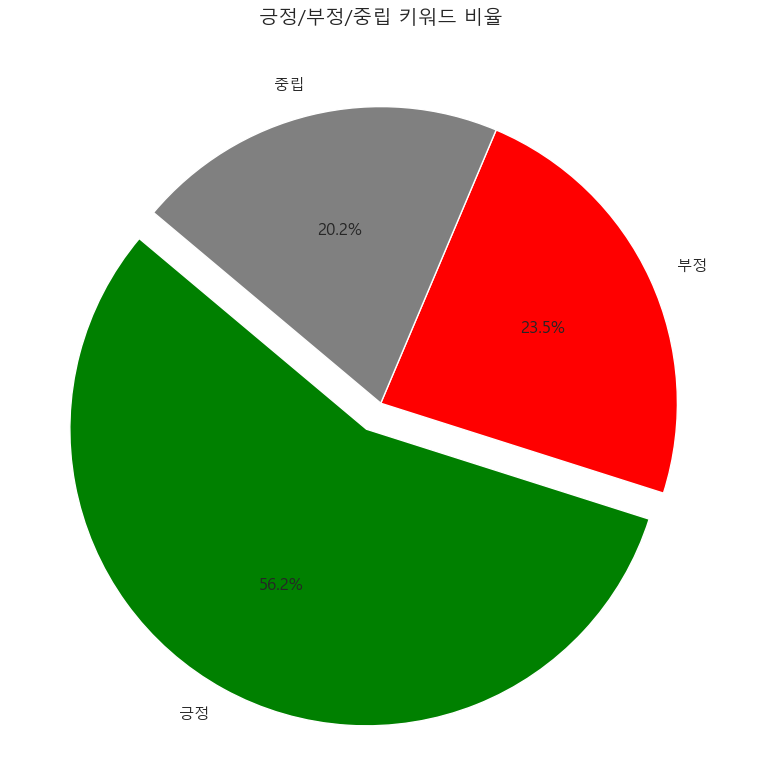

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 읽기
file_path = "LG요인분석.xlsx"  # 실제 파일 경로로 수정
data = pd.read_excel(file_path)

# 필요한 열 선택
required_columns = ['전체', '건수', 'type']

if all(col in data.columns for col in required_columns):
    # 데이터 필터링
    filtered_data = data[required_columns].copy()
    
    # 결측값 제거
    filtered_data = filtered_data.dropna()
    
    # 감성별 건수 집계
    sentiment_summary = filtered_data.groupby('type')['건수'].sum()
    
    # 감성 비율 계산
    sentiment_percentage = (sentiment_summary / sentiment_summary.sum()) * 100
    
    # 결과 출력
    print("감성 비율 분석:")
    print(sentiment_percentage)

 # 원그래프 시각화
plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_percentage, 
    labels=sentiment_percentage.index, 
    autopct='%1.1f%%', 
    colors=['green', 'red', 'gray'], 
    startangle=140,
    explode=(0.1, 0, 0)  # 긍정 부분 강조
    )
plt.title('긍정/부정/중립 키워드 비율', fontsize=14)
plt.tight_layout()
plt.show()

from openpyxl import load_workbook, Workbook # 1. 기존 워크북 열기 input_file = "example.xlsx"  # 기존 파일 경로 wb = load_workbook(input_file) ws = wb.active # 작업할 시트 선택 (첫 번째 시트)# 2. 특정 열 데이터 추출 (예: 첫 번째 열) target_column_index = 1  # 추출할 열 번호 (1 = A열, 2 = B열, ...) column_data = [row[target_column_index - 1].value for row in ws.iter_rows()] # 0-based index# 3. 새 워크북 생성 및 데이터 저장 new_wb = Workbook() new_ws = new_wb.active for idx, value in enumerate(column_data, start=1): new_ws.cell(row=idx, column=1, value=value) # 새 워크북의 첫 번째 열에 저장# 4. 새 파일 저장 output_file = "output.xlsx"  # 새 파일 경로 new_wb.save(output_file) print(f"{output_file}에 저장 완료!")

In [123]:
from openpyxl import load_workbook, Workbook

wb = load_workbook('유튜브 평판요인.xlsx')
ws = wb.active
year_index = 1
target_index = list(range(3,33,3))
raw = ws.max_row

n=1
for i in target_index:
    file = f'구단별유튜브키워드{n}.xlsx'
    new_wb = Workbook()
    new_ws = new_wb.active
    for r in range(3,raw+1):
        data = ws.cell(r,1).value
        new_ws.cell(r-2,1,data)
    key = 2
    for r in range(3,raw+1):
        data = ws.cell(r,i).value
        new_ws.cell(r-2,key,data)
    key+=1
    for r in range(3,raw+1):
        data = ws.cell(r,i+1).value
        new_ws.cell(r-2,key,data)
    key+=1
    for r in range(3,raw+1):
        data = ws.cell(r,i+2).value
        new_ws.cell(r-2,key,data)
    # key+=1
    # for r in range(3,raw):
    #     new_ws.cell(r,key) = ws.cell(r,i).value
    # key+=1
    # for r in range(3,raw):
    #     new_ws.cell(r,key) = ws.cell(r,i).value
    #print(i,i+1,i+2)
    new_wb.save(file)
    n += 1

In [131]:
# data = data.dropna()

In [132]:
# data.info()

In [133]:
# data['기간'] = data['Unnamed: 0']
# data = data.drop(['Unnamed: 0'], axis = 1)
# data

구단별, 기간별로 유튜브 키워드를 분류한 엑셀파일을 데이터프레임으로 로드 후 감성 비율 계산 
- 각 엑셀파일은 구단별로 나누어져 있고, 2022년 - 2024년 데이터가 통합되어 있으므로
- data.groupby(['기간','type']) 와 같이 인덱스가 기간과 type이어야 합니다. 

In [ ]:

# 구단 이름 리스트
team_names = ['LG(서울)', '두산(서울)', '키움(서울)', '기아(광주)', '삼성(대구)', 
              'kt(수원)', 'ssg(인천)', '한화(대전)', '롯데(부산)', 'nc(창원)']

name = list(range(1, 11))

for j in name:
    data = pd.read_excel(f'구단별유튜브키워드{j}.xlsx')
    data = data.dropna()

    # unnamed 열 제거하고 '기간'으로 변경
    data['기간'] = data['Unnamed: 0']
    data = data.drop(['Unnamed: 0'], axis = 1)

    year = [2024,2023,2022]
    senti_sum = data.groupby(['기간','type'])['건수'].sum()
    for i in year:
        # 구단 이름 출력
        print(f'{i}년도')
        print(senti_sum[i]/senti_sum[i].sum() * 100)
    

2024년도
type
긍정    56.209826
부정    23.542241
중립    20.247934
Name: 건수, dtype: object
2023년도
type
긍정    59.856115
부정    20.959233
중립    19.184652
Name: 건수, dtype: object
2022년도
type
긍정    57.901657
부정    18.090981
중립    24.007363
Name: 건수, dtype: object
2024년도
type
긍정    46.795758
부정    29.691102
중립     23.51314
Name: 건수, dtype: object
2023년도
type
긍정    62.663424
부정    16.266342
중립    21.070234
Name: 건수, dtype: object
2022년도
type
긍정    65.039841
부정    15.089641
중립    19.870518
Name: 건수, dtype: object
2024년도
type
긍정    47.342733
부정    29.609544
중립    23.047722
Name: 건수, dtype: object
2023년도
type
긍정    54.450682
부정    22.373697
중립    23.175621
Name: 건수, dtype: object
2022년도
type
긍정    53.096539
부정    23.041894
중립    23.861566
Name: 건수, dtype: object
2024년도
type
긍정    50.791779
부정    29.523248
중립    19.684973
Name: 건수, dtype: object
2023년도
type
긍정    55.832735
부정    23.815506
중립    20.351759
Name: 건수, dtype: object
2022년도
type
긍정    66.598246
부정     14.14443
중립    19.257324
Name: 건수, dtype:


LG(서울)

2024년도 감성 비율:
type
긍정    56.209826
부정    23.542241
중립    20.247934
Name: 건수, dtype: object

2023년도 감성 비율:
type
긍정    59.856115
부정    20.959233
중립    19.184652
Name: 건수, dtype: object

2022년도 감성 비율:
type
긍정    57.901657
부정    18.090981
중립    24.007363
Name: 건수, dtype: object


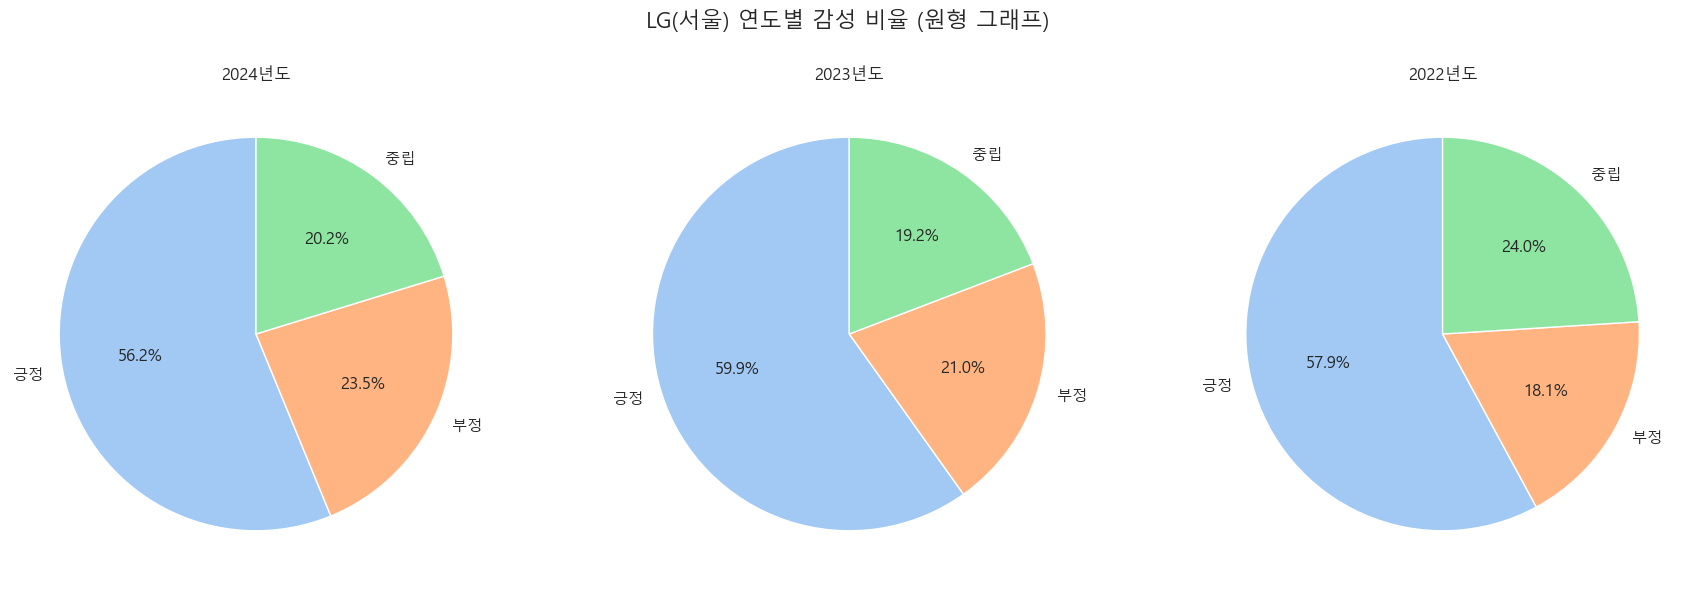


두산(서울)

2024년도 감성 비율:
type
긍정    46.795758
부정    29.691102
중립     23.51314
Name: 건수, dtype: object

2023년도 감성 비율:
type
긍정    62.663424
부정    16.266342
중립    21.070234
Name: 건수, dtype: object

2022년도 감성 비율:
type
긍정    65.039841
부정    15.089641
중립    19.870518
Name: 건수, dtype: object


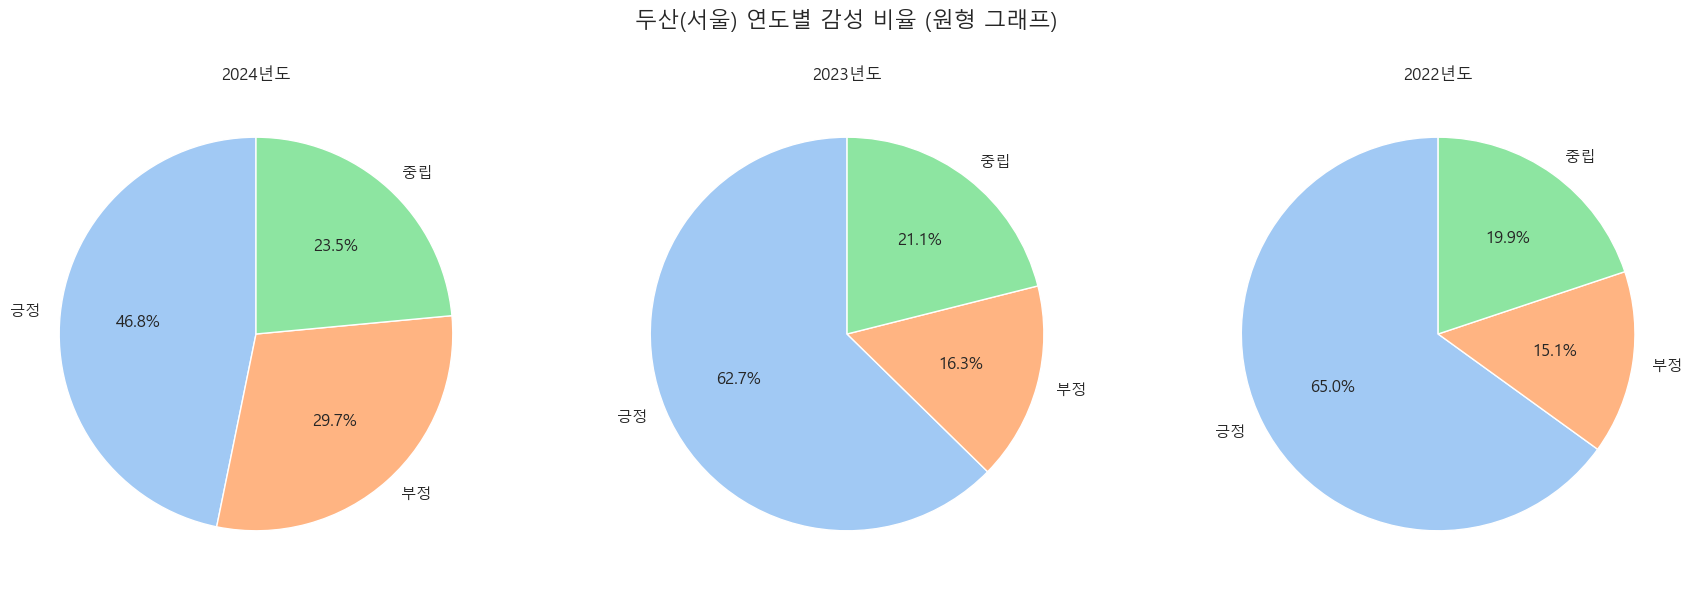


키움(서울)

2024년도 감성 비율:
type
긍정    47.342733
부정    29.609544
중립    23.047722
Name: 건수, dtype: object

2023년도 감성 비율:
type
긍정    54.450682
부정    22.373697
중립    23.175621
Name: 건수, dtype: object

2022년도 감성 비율:
type
긍정    53.096539
부정    23.041894
중립    23.861566
Name: 건수, dtype: object


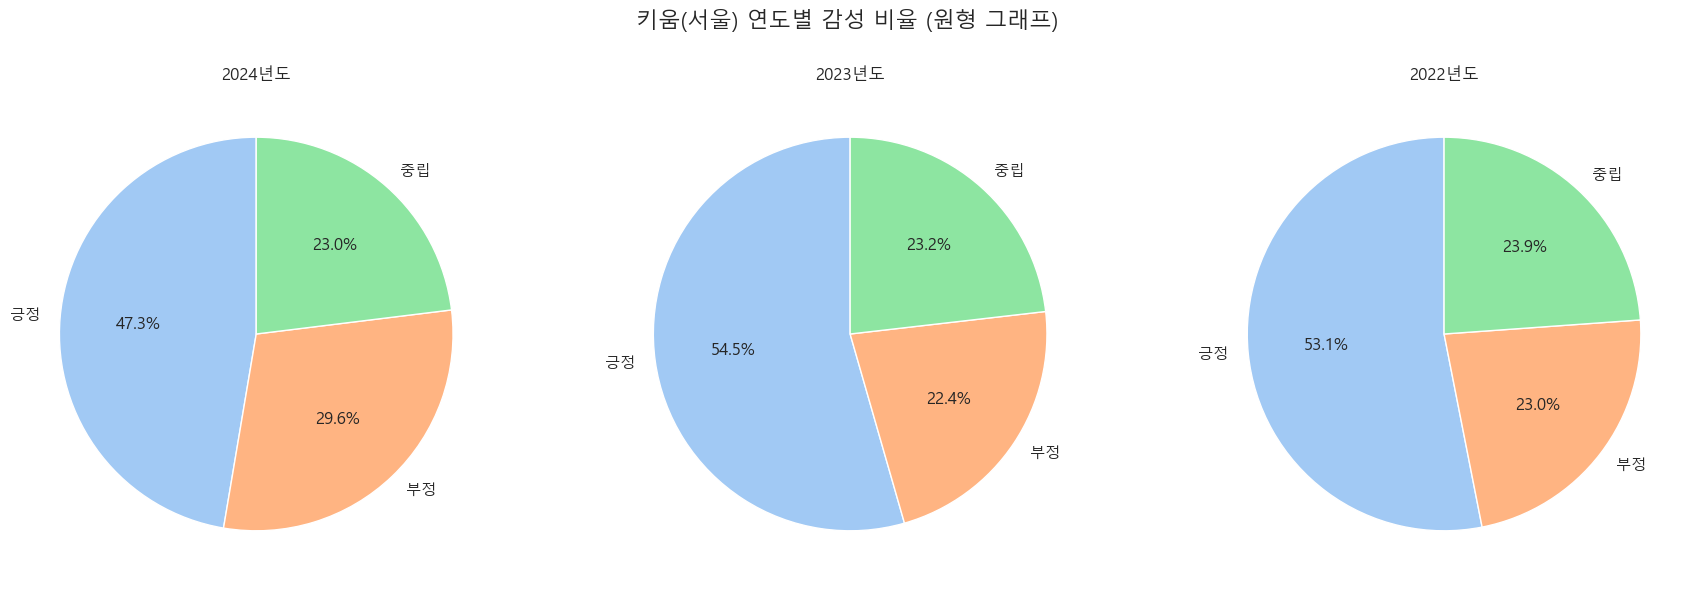


기아(광주)

2024년도 감성 비율:
type
긍정    50.791779
부정    29.523248
중립    19.684973
Name: 건수, dtype: object

2023년도 감성 비율:
type
긍정    55.832735
부정    23.815506
중립    20.351759
Name: 건수, dtype: object

2022년도 감성 비율:
type
긍정    66.598246
부정     14.14443
중립    19.257324
Name: 건수, dtype: object


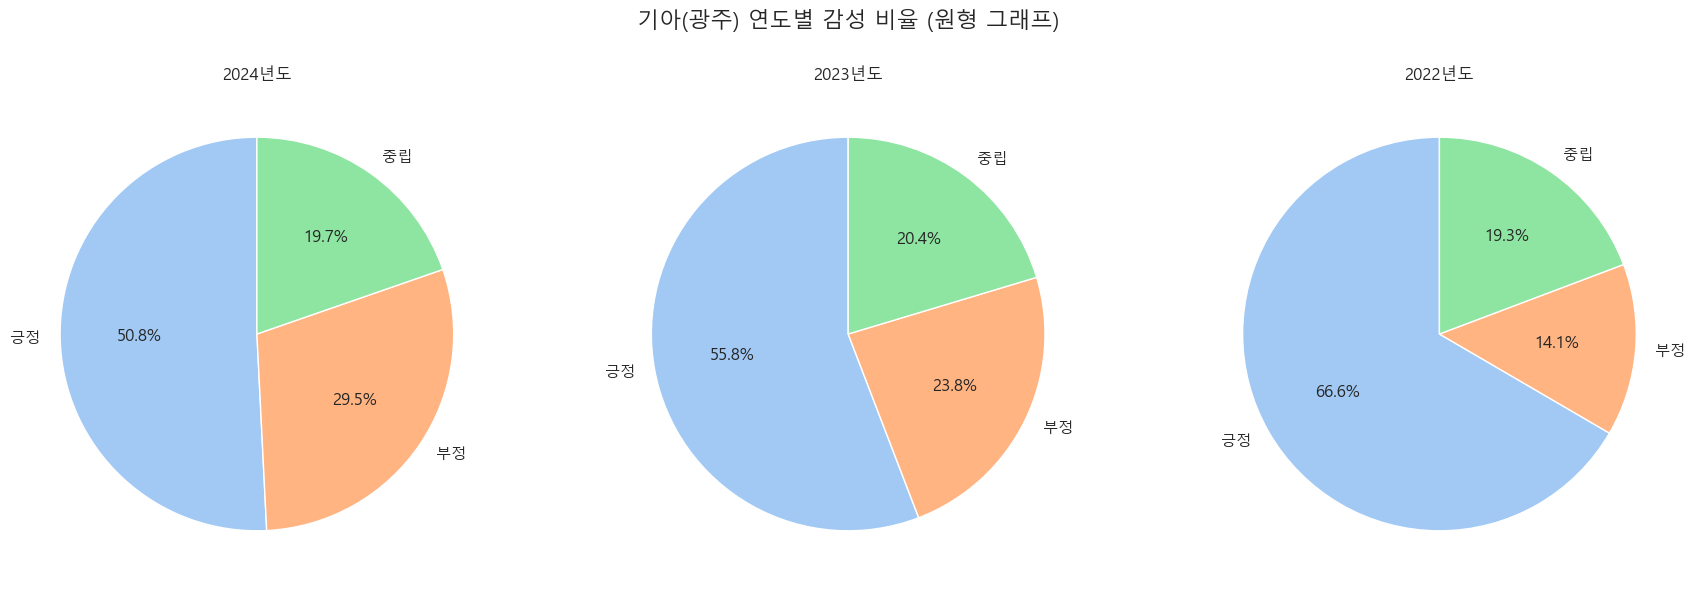


삼성(대구)

2024년도 감성 비율:
type
긍정    49.513619
부정    28.064202
중립    22.422179
Name: 건수, dtype: object

2023년도 감성 비율:
type
긍정    57.136136
부정    22.694479
중립    20.169385
Name: 건수, dtype: object

2022년도 감성 비율:
type
긍정    68.410563
부정    14.449427
중립     17.14001
Name: 건수, dtype: object


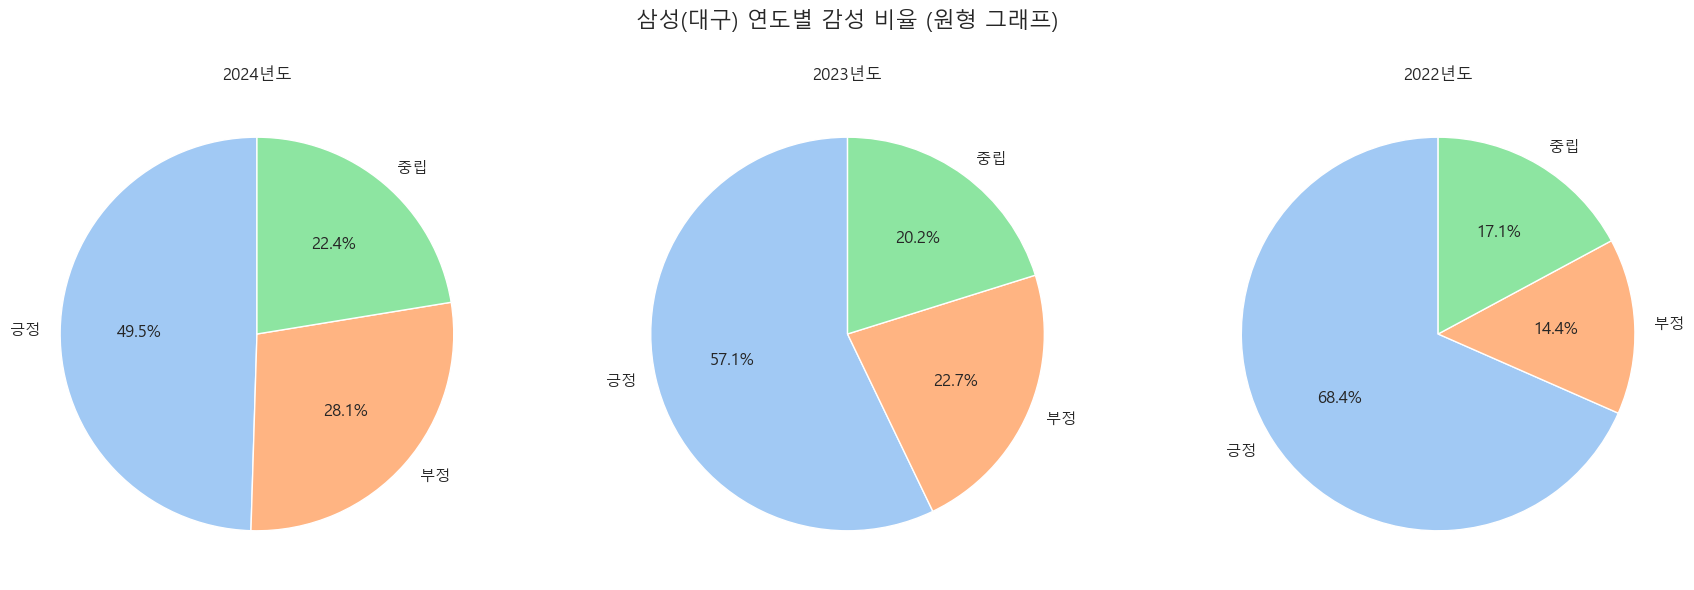


kt(수원)

2024년도 감성 비율:
type
긍정    67.132867
부정     8.391608
중립    24.475524
Name: 건수, dtype: object

2023년도 감성 비율:
type
긍정    53.773585
부정    12.264151
중립    33.962264
Name: 건수, dtype: object

2022년도 감성 비율:
type
긍정    55.732484
부정    12.101911
중립    32.165605
Name: 건수, dtype: object


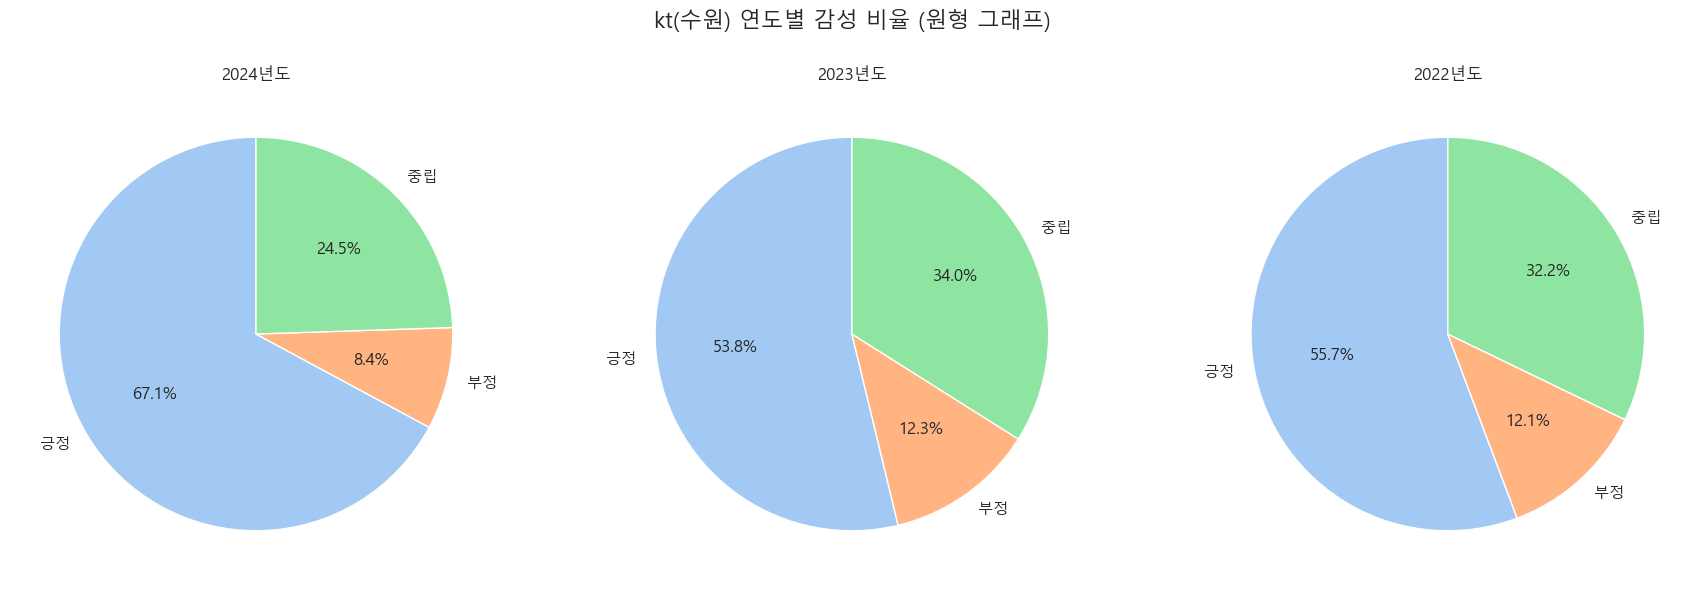


ssg(인천)

2024년도 감성 비율:
type
긍정    57.450331
부정    22.061258
중립    20.488411
Name: 건수, dtype: object

2023년도 감성 비율:
type
긍정    61.792453
부정    16.285998
중립    21.921549
Name: 건수, dtype: object

2022년도 감성 비율:
type
긍정    67.663551
부정    13.130841
중립    19.205607
Name: 건수, dtype: object


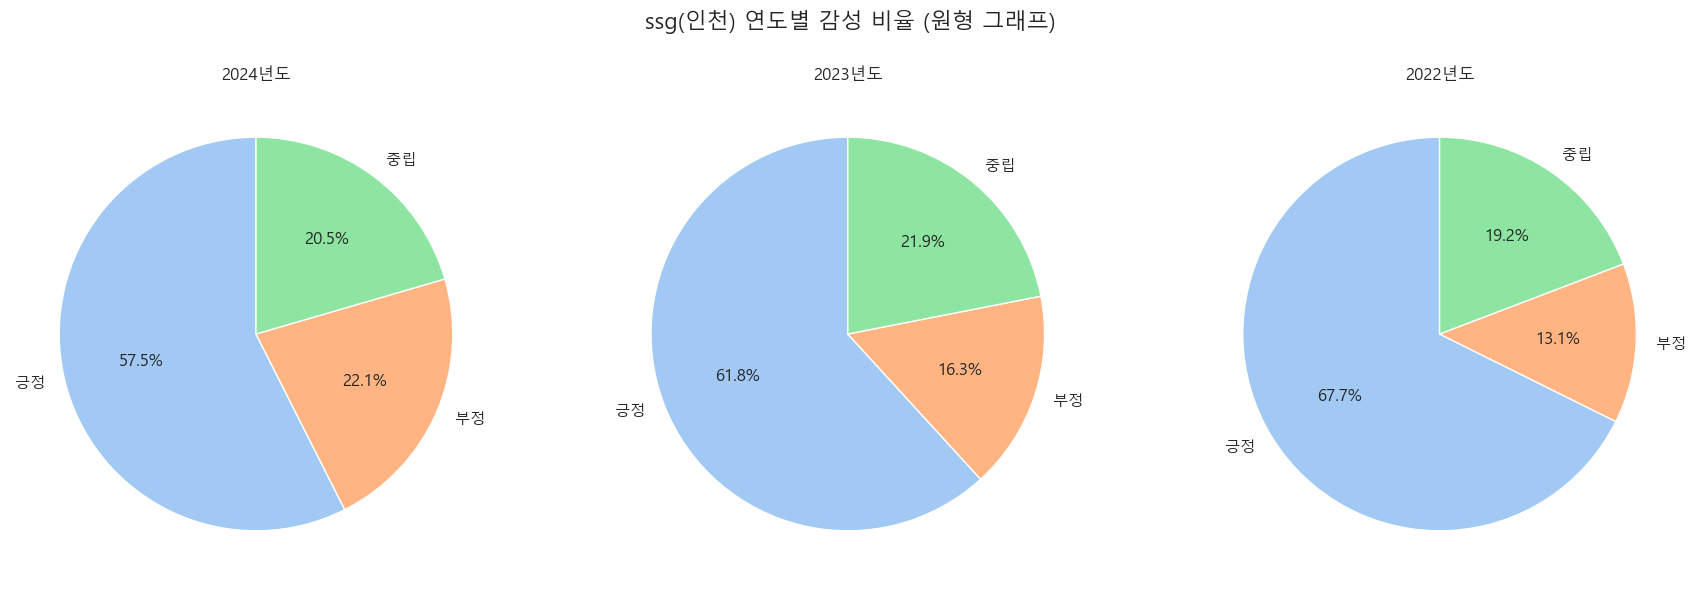


한화(대전)

2024년도 감성 비율:
type
긍정    46.294035
부정    32.062001
중립    21.643964
Name: 건수, dtype: object

2023년도 감성 비율:
type
긍정    49.178645
부정    29.158111
중립    21.663244
Name: 건수, dtype: object

2022년도 감성 비율:
type
긍정    58.002039
부정    22.099898
중립    19.898063
Name: 건수, dtype: object


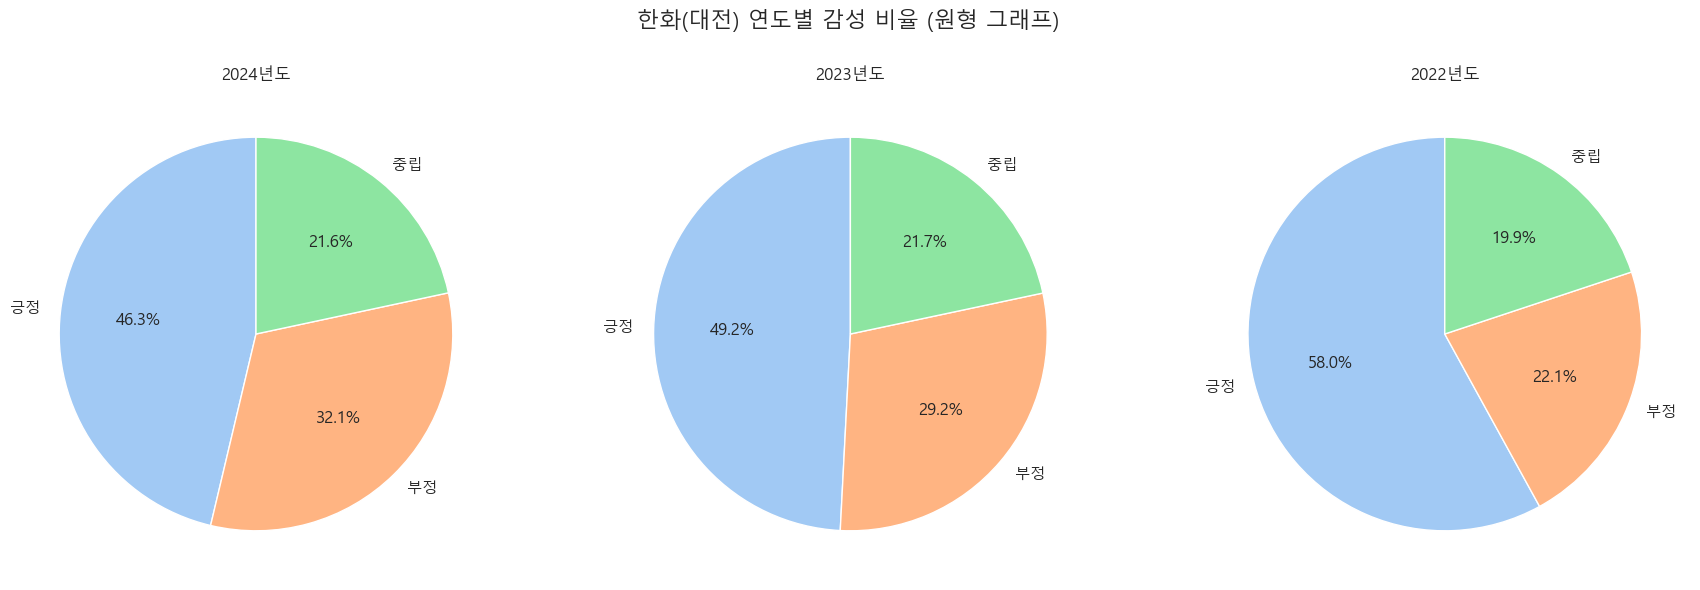


롯데(부산)

2024년도 감성 비율:
type
긍정    63.654761
부정    20.246889
중립    16.098351
Name: 건수, dtype: object

2023년도 감성 비율:
type
긍정     60.27857
부정    23.510656
중립    16.210774
Name: 건수, dtype: object

2022년도 감성 비율:
type
긍정    52.207912
부정     23.75805
중립    24.034039
Name: 건수, dtype: object


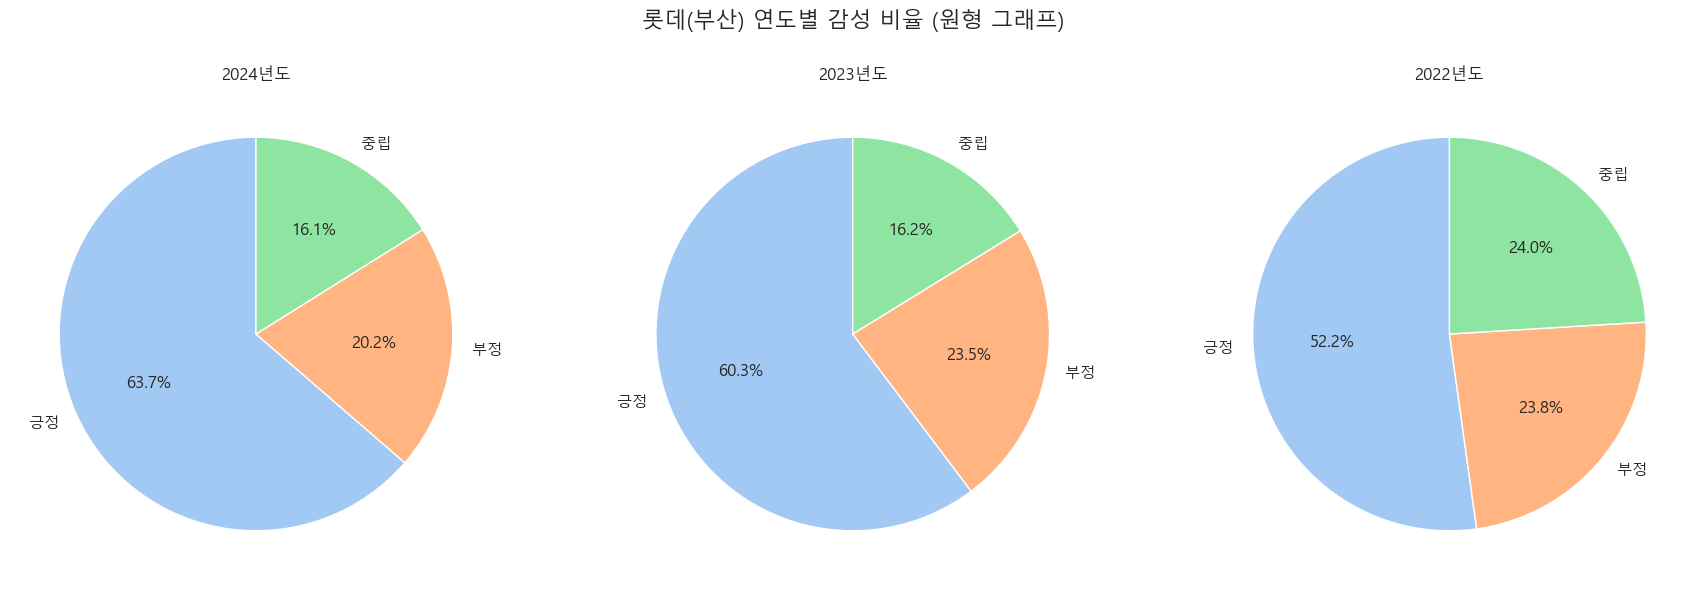


nc(창원)

2024년도 감성 비율:
type
긍정    41.627001
부정    33.578537
중립    24.794461
Name: 건수, dtype: object

2023년도 감성 비율:
type
긍정    68.026101
부정    13.539967
중립    18.433931
Name: 건수, dtype: object

2022년도 감성 비율:
type
긍정    54.761905
부정    21.861472
중립    23.376623
Name: 건수, dtype: object


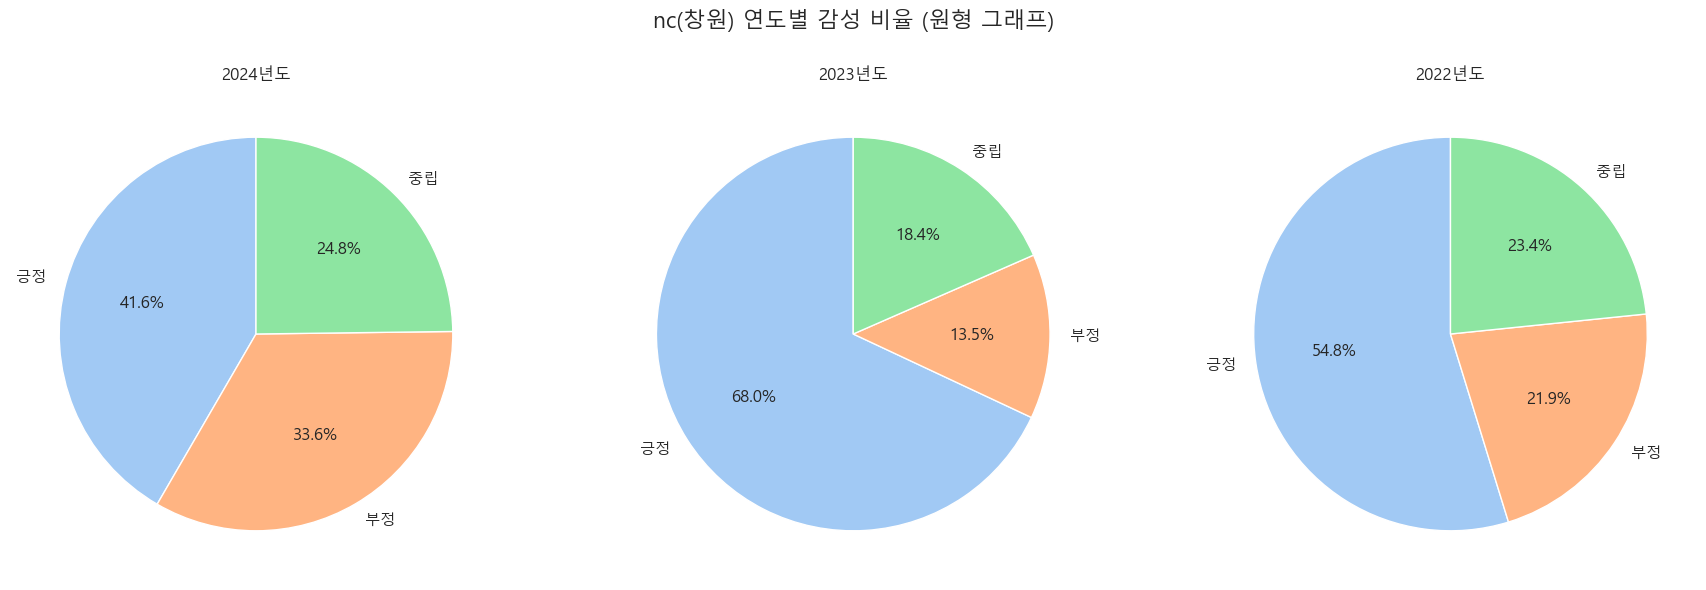

In [ ]:
# 구단 이름 리스트
team_names = ['LG(서울)', '두산(서울)', '키움(서울)', '기아(광주)', '삼성(대구)', 
              'kt(수원)', 'ssg(인천)', '한화(대전)', '롯데(부산)', 'nc(창원)']

# 파일 이름 리스트 (구단별 키워드 파일)
file_numbers = list(range(1, 11))

# 연도 리스트
years = [2024, 2023, 2022]

# 각 구단 파일 처리
for j, team in zip(file_numbers, team_names):
    # 파일 읽기
    data = pd.read_excel(f'구단별유튜브키워드{j}.xlsx')
    data = data.dropna()

    # 'Unnamed: 0'을 '기간'으로 변경
    data['기간'] = data['Unnamed: 0']
    data = data.drop(['Unnamed: 0'], axis=1)

    # 감성별 건수 집계
    senti_sum = data.groupby(['기간', 'type'])['건수'].sum()

    # 구단 이름 출력
    print(f"\n{team}")

    # 연도별 출력
    for year in years:
        if year in senti_sum.index.get_level_values('기간'):
            # 연도별 감성 비율 계산
            year_data = senti_sum.loc[year]
            sentiment_percentage = (year_data / year_data.sum()) * 100

            # 출력
            print(f"\n{year}년도 감성 비율:")
            print(sentiment_percentage)
        else:
            print(f"\n{year}년도 데이터가 없습니다.")

    # 시각화 설정
    fig, axes = plt.subplots(1, len(years), figsize=(18, 6))
    fig.suptitle(f"{team} 연도별 감성 비율 (원형 그래프)", fontsize=16)

    # 연도별 원형 그래프
    for i, year in enumerate(years):
        ax = axes[i]
        if year in senti_sum.index.get_level_values('기간'):
            # 연도별 감성 비율 계산
            year_data = senti_sum.loc[year]
            sentiment_percentage = (year_data / year_data.sum()) * 100

            # 원형 그래프 그리기
            ax.pie(sentiment_percentage, labels=year_data.index, autopct='%1.1f%%', startangle=90)
            ax.set_title(f"{year}년도")
        else:
            ax.axis('off')
            ax.set_title(f"{year}년도 데이터 없음")

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

In [14]:
# 엑셀파일로 저장

# import pandas as pd
# import matplotlib.pyplot as plt

# # 구단 이름 리스트
# team_names = ['LG(서울)', '두산(서울)', '키움(서울)', '기아(광주)', '삼성(대구)', 
#               'kt(수원)', 'ssg(인천)', '한화(대전)', '롯데(부산)', 'nc(창원)']

# # 파일 이름 리스트 (구단별 키워드 파일)
# file_numbers = list(range(1, 11))

# # 연도 리스트
# years = [2024, 2023, 2022]

# # 감성 비율을 저장할 딕셔너리
# team_sentiment_dict = {}

# # 각 구단 파일 처리
# for j, team in zip(file_numbers, team_names):
#     # 파일 읽기
#     data = pd.read_excel(f'구단별유튜브키워드{j}.xlsx')
#     data = data.dropna()

#     # 'Unnamed: 0'을 '기간'으로 변경
#     data['기간'] = data['Unnamed: 0']
#     data = data.drop(['Unnamed: 0'], axis=1)

#     # 감성별 건수 집계
#     senti_sum = data.groupby(['기간', 'type'])['건수'].sum()

#     # 구단별 감성 비율 데이터프레임 생성
#     sentiment_data = []

#     # 연도별 감성 비율 계산
#     for year in years:
#         if year in senti_sum.index.get_level_values('기간'):
#             year_data = senti_sum.loc[year]
#             sentiment_percentage = (year_data / year_data.sum()) * 100
#             sentiment_percentage = sentiment_percentage.reset_index()
#             sentiment_percentage['연도'] = year
#             sentiment_data.append(sentiment_percentage)
#         else:
#             print(f"{team}의 {year}년도 데이터가 없습니다.")

#     # 데이터프레임 병합 및 저장
#     if sentiment_data:
#         team_sentiment_df = pd.concat(sentiment_data, ignore_index=True)
#         team_sentiment_df = team_sentiment_df.rename(columns={'type': '감성 유형', '건수': '비율'})
#         team_sentiment_dict[team] = team_sentiment_df

# # 엑셀 파일로 저장
# output_file = "구단별_감성비율.xlsx"
# with pd.ExcelWriter(output_file, engine='openpyxl') as writer:  # openpyxl 엔진 사용
#     for team, df in team_sentiment_dict.items():
#         df.to_excel(writer, sheet_name=team, index=False)

# print(f"구단별 감성비율 데이터가 '{output_file}' 파일로 저장되었습니다.")

In [128]:
# 상관관계 분석

In [ ]:
# Step 1: 데이터 불러오기
file_path = '구단별_감성비율.xlsx'  # 파일 경로 설정
data = pd.read_excel(file_path)

# Step 2: 구단별 데이터 필터링 및 상관관계 분석
teams = data['구단'].unique()  # 구단 목록 추출
results = []  # 결과 저장 리스트

# 구단별 상관관계 계산
for team in teams:
    team_data = data[data['구단'] == team]
    
    # 감성 유형별 데이터 추출
    positive = team_data[team_data['감성 유형'] == '긍정']
    negative = team_data[team_data['감성 유형'] == '부정']
    neutral = team_data[team_data['감성 유형'] == '중립']
    
    # 상관관계 계산
    positive_corr, _ = pearsonr(positive['비율'], positive['관중수'])
    negative_corr, _ = pearsonr(negative['비율'], negative['관중수'])
    neutral_corr, _ = pearsonr(neutral['비율'], neutral['관중수'])
    
    # 결과 저장
    results.append({
        '구단': team,
        '긍정 상관계수': round(positive_corr, 3),
        '부정 상관계수': round(negative_corr, 3),
        '중립 상관계수': round(neutral_corr, 3)
    })

# Step 3: 결과 데이터프레임 출력
results_df = pd.DataFrame(results)
print("구단별 감성 비율과 관중 수의 상관관계:")
print(results_df)



구단별 감성 비율과 관중 수의 상관관계:
    구단  긍정 상관계수  부정 상관계수  중립 상관계수
0   LG   -0.389    0.999   -0.794
1   두산   -0.915    0.895    0.979
2   키움   -0.753    0.813   -0.935
3  KIA   -0.840    0.870    0.031
4   삼성   -0.902    0.897    0.913
5   KT    0.767   -0.827   -0.739
6  SSG   -0.999    0.976    0.518
7   한화   -0.963    0.975    0.868
8   롯데    0.919   -0.959   -0.776
9   NC   -0.527    0.610    0.246


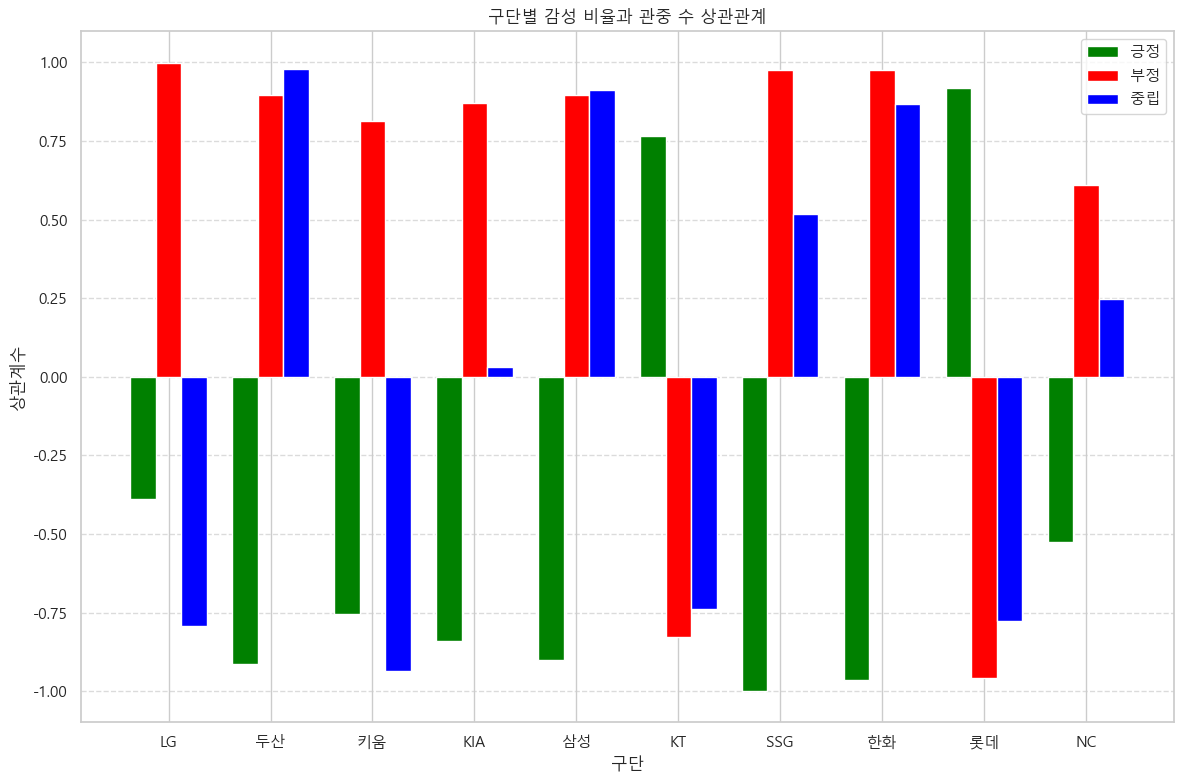

In [101]:
# 시각화

# 데이터프레임
results = pd.DataFrame({
    '구단': ['LG', '두산', '키움', 'KIA', '삼성', 'KT', 'SSG', '한화', '롯데', 'NC'],
    '긍정': [-0.389, -0.915, -0.753, -0.840, -0.902, 0.767, -0.999, -0.963, 0.919, -0.527],
    '부정': [0.999, 0.895, 0.813, 0.870, 0.897, -0.827, 0.976, 0.975, -0.959, 0.610],
    '중립': [-0.794, 0.979, -0.935, 0.031, 0.913, -0.739, 0.518, 0.868, -0.776, 0.246]
})

# 시각화
plt.figure(figsize=(12, 8))
bar_width = 0.25
index = range(len(results))

plt.bar(index, results['긍정'], bar_width, label='긍정', color='green')
plt.bar([i + bar_width for i in index], results['부정'], bar_width, label='부정', color='red')
plt.bar([i + 2 * bar_width for i in index], results['중립'], bar_width, label='중립', color='blue')

plt.xticks([i + bar_width for i in index], results['구단'])
plt.title("구단별 감성 비율과 관중 수 상관관계")
plt.xlabel("구단")
plt.ylabel("상관계수")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


1. 대부분의 구단에서 부정적 감성이 관중 수 증가와 강한 양의 상관관계를 보입니다.
2. 긍정적 감성은 관중 수와 음의 상관관계를 나타내는 구단이 많습니다.
- 이는 부정적인 이슈나 논란이 팬들의 관심을 끌어 경기장 방문을 유도하는 '역설적 현상'으로 해석할 수 있습니다.
3. 중립 감성은 구단에 따라 다르게 작용하지만, 일부 구단에서는 강한 양의 상관관계를 나타냈습니다.

시사점

1. 구단은 부정적 이슈를 적절히 활용해 팬들의 관심을 끌면서도, 긍정적인 요소를 강화해 장기적으로 팬 충성도를 높이는 전략이 필요합니다.
2. 중립적 감성은 관중 수에 큰 영향을 미치지 않는 경우가 많으므로 감정 상태를 긍정적으로 전환할 방안이 필요합니다.

한계점:

관중수의 데이터가 홈팀 기준으로 정의했지만 원정팀도 포함되어 있기 때문에, 구단별 감성비율과 상관관계 분석시 오차 요인으로 작용 가능하다.

보완 방향:
관중 수에 영향을 미치는 다양한 요인을 포함하여 분석한다.


결론 :
부정적 감성이 일시적으로 관중 수를 증가시킬 수 있으나, 이는 장기적으로 위험하다.

핵심 전략: 긍정적 감성을 높이는 방향으로 전환하면서, 부정적 이슈에 대한 대응은 투명하고 신속하게 진행해야 한다. 이는 팬 참여형 이벤트를 강화하여 소셜 미디어나 경기장 이벤트를 통해 팬들의 관심을 긍정적인 방향으로 전환하거나 구단의 사회공헌 활동 등 긍정적 콘텐츠 제작으로 여론과 이미지를 개선할 수 있다.

# 데이터시각화 

## 1. 팬 데이터 시각화 

### 지역별 관중 수 분포 - 히트맵 

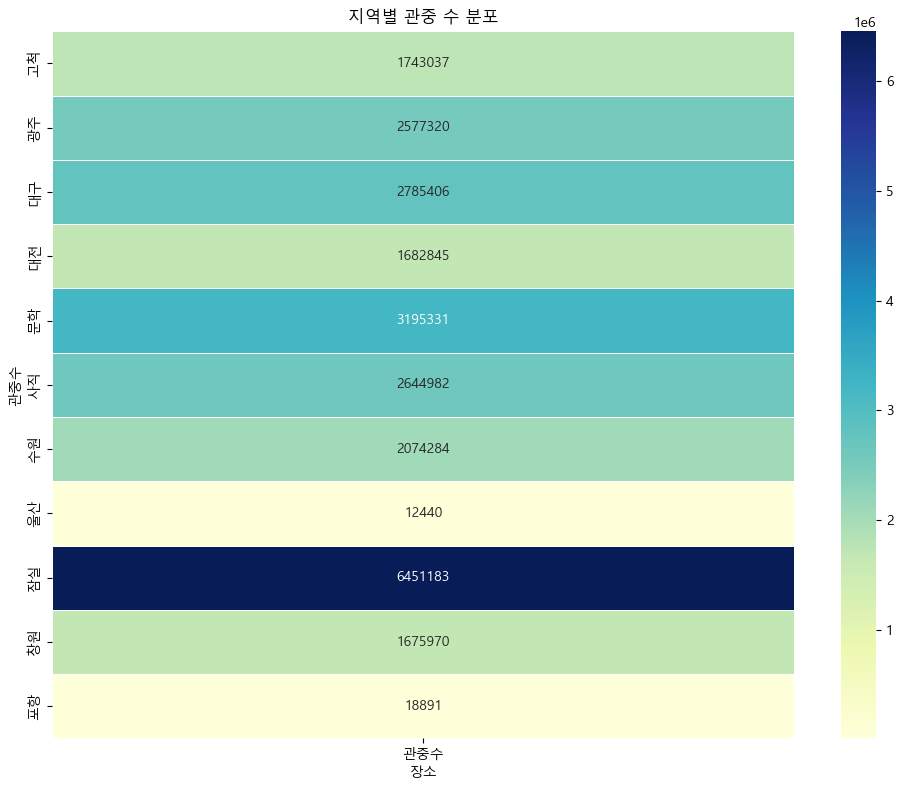

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False

# 엑셀 파일 로드
file_path = "시즌경기_정제완료.xlsx"  # 파일 경로를 입력하세요
df = pd.read_excel(file_path)

# 필요한 열 선택 및 데이터 정제
df = df[['장소', '관중수']].dropna()  # NaN 값 제거
df['관중수'] = pd.to_numeric(df['관중수'], errors='coerce')  # 관중수 열을 숫자로 변환
df = df.dropna()  # 변환 후 NaN 값 제거

# 지역별 관중 수 합계 계산
region_data = df.groupby('장소')['관중수'].sum().reset_index()

# 피벗 테이블 생성 (히트맵 형태에 맞게)
pivot_data = region_data.pivot_table(values='관중수', index='장소', aggfunc='sum')

# 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('지역별 관중 수 분포')
plt.xlabel('장소')
plt.ylabel('관중수')
plt.tight_layout()

# 그래프 표시
plt.show()


### 언급량과 감성 분석 결과: 워드 클라우드와 트렌드 그래프 

## 2. 지역 데이터 시각화 

### 매출 증감 그래프: 지역별 매출 증감률 - 막대그래프 


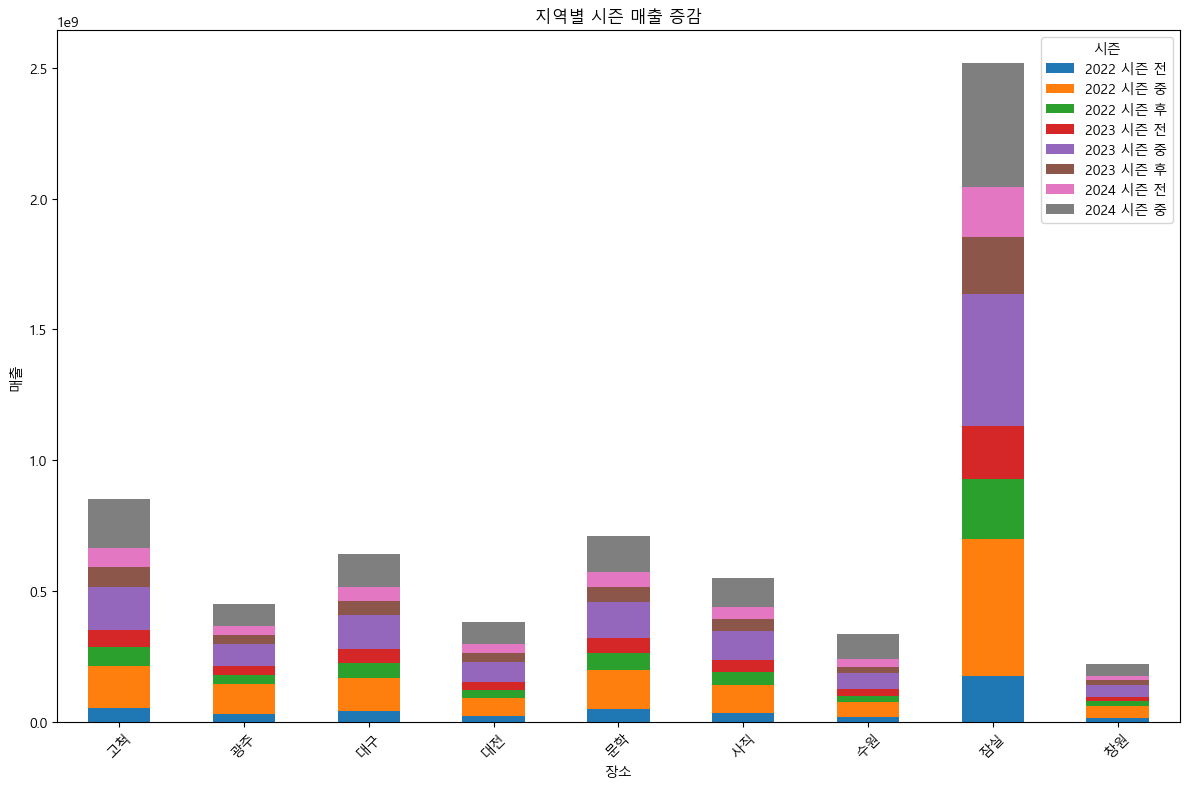

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 엑셀 파일 로드
file_path = "관광지출액.xlsx"  # 파일 경로를 입력하세요
df = pd.read_excel(file_path)

# 필요한 열 선택 및 데이터 정제
df = df[['장소', '매출', '시즌']].dropna()  # NaN 값 제거
df['매출'] = pd.to_numeric(df['매출'], errors='coerce')  # 매출 열을 숫자로 변환
df = df.dropna()  # 변환 후 NaN 값 제거

# 데이터 집계: 장소와 시즌별 매출 합계
grouped_data = df.groupby(['장소', '시즌'])['매출'].sum().reset_index()

# 피벗 테이블 생성 (막대그래프에 적합한 형태로 변환)
pivot_data = grouped_data.pivot(index='장소', columns='시즌', values='매출')

# 그래프 생성
pivot_data.plot(kind='bar', figsize=(12, 8), stacked=True)

# 그래프 설정
plt.title('지역별 시즌 매출 증감')
plt.xlabel('장소')
plt.ylabel('매출')
plt.xticks(rotation=45)  # x축 레이블 각도 조정
plt.legend(title='시즌')
plt.tight_layout()

# 그래프 표시
plt.show()
           

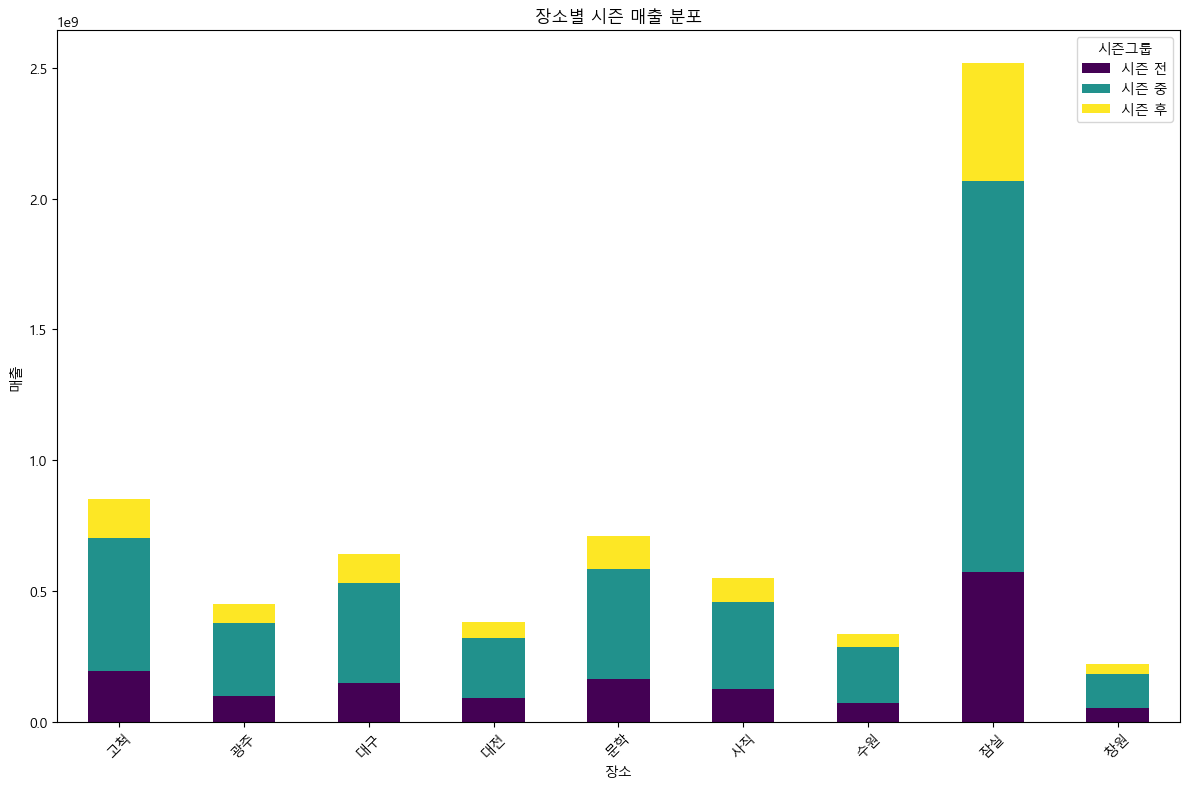

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import re  # 정규식 모듈

# 엑셀 파일 로드
file_path = "관광지출액.xlsx"  # 파일 경로를 입력하세요
df = pd.read_excel(file_path)

# 필요한 열 선택 및 데이터 정제
df = df[['장소', '매출', '시즌']].dropna()  # NaN 값 제거
df['매출'] = pd.to_numeric(df['매출'], errors='coerce')  # 매출 열을 숫자로 변환
df = df.dropna()  # 변환 후 NaN 값 제거

# 숫자를 제외한 시즌 그룹 추출
def remove_numbers(text):
    return re.sub(r'\d+', '', text).strip()  # 숫자 제거 후 공백 제거

df['시즌그룹'] = df['시즌'].apply(remove_numbers)

# 데이터 집계: 장소와 시즌그룹별 매출 합계
grouped_data = df.groupby(['장소', '시즌그룹'])['매출'].sum().reset_index()

# 피벗 테이블 생성 (막대그래프에 적합한 형태로 변환)
pivot_data = grouped_data.pivot(index='장소', columns='시즌그룹', values='매출').fillna(0)

# 그래프 생성
pivot_data.plot(kind='bar', figsize=(12, 8), stacked=True, colormap='viridis')

# 그래프 설정
plt.title('장소별 시즌 매출 분포')
plt.xlabel('장소')
plt.ylabel('매출')
plt.xticks(rotation=45)  # x축 레이블 각도 조정
plt.legend(title='시즌그룹')
plt.tight_layout()

# 그래프 표시
plt.show()
